In [1]:
# 1) Importing All Libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import customtkinter as ctk
import tkinter as tk

In [2]:
import seaborn as sns

**Lodaing and Understanding Data**

In [3]:
df=pd.read_csv('ball_by_ball_it20.csv')
df

,Index,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425114,425114,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,2,TK Curran,...,New Zealand,0,11,2,9,2,NaN,NaN,0,1
425115,425115,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,3,TK Curran,...,New Zealand,0,12,2,10,2,NaN,NaN,1,1
425116,425116,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,...,New Zealand,0,2,12,3,10,NaN,NaN,0,1
425117,425117,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,...,New Zealand,0,3,12,4,10,NaN,NaN,1,1


In [4]:
df.columns

Index(['Index', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425119 entries, 0 to 425118
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    425119 non-null  int64  
 1   Match ID                 425119 non-null  int64  
 2   Date                     425119 non-null  object 
 3   Venue                    425119 non-null  object 
 4   Bat First                425119 non-null  object 
 5   Bat Second               425119 non-null  object 
 6   Innings                  425119 non-null  int64  
 7   Over                     425119 non-null  int64  
 8   Ball                     425119 non-null  int64  
 9   Batter                   425119 non-null  object 
 10  Non Striker              425119 non-null  object 
 11  Bowler                   425119 non-null  object 
 12  Batter Runs              425119 non-null  int64  
 13  Extra Runs               425119 non-null  int64  
 14  Runs

In [6]:
df.describe()

,Index,Match ID,Innings,Over,Ball,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Wicket,...,Balls Remaining,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
count,425119.000000,4.251190e+05,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,...,425119.000000,425119.000000,425119.00000,425119.000000,425119.000000,425119.000000,23659.000000,23659.000000,425119.000000,425119.000000
mean,212559.000000,1.089415e+06,1.471172,9.959395,3.486377,1.139502,0.075132,1.214634,0.040189,0.055653,...,62.797443,0.483994,14.71182,13.952406,12.486560,12.138455,15.386280,13.853502,1.187710,0.959811
std,122721.428881,3.224052e+05,0.499169,5.633134,1.708903,1.546020,0.359310,1.536030,0.196402,0.229250,...,33.835073,0.499744,16.64172,15.976979,11.475981,11.336384,17.408768,11.983127,1.539459,0.196402
min,0.000000,2.110280e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106279.500000,9.513730e+05,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34.000000,0.000000,2.00000,2.000000,4.000000,3.000000,2.000000,5.000000,0.000000,1.000000
50%,212559.000000,1.233980e+06,1.000000,10.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,64.000000,0.000000,9.00000,8.000000,9.000000,9.000000,9.000000,10.000000,1.000000,1.000000
75%,318838.500000,1.310948e+06,2.000000,15.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,92.000000,1.000000,21.00000,20.000000,18.000000,18.000000,22.000000,20.000000,1.000000,1.000000
max,425118.000000,1.393328e+06,2.000000,20.000000,7.000000,7.000000,6.000000,8.000000,1.000000,1.000000,...,120.000000,1.000000,172.00000,168.000000,76.000000,74.000000,172.000000,76.000000,8.000000,1.000000


**Visualizing the Distribution**

Categorical Columns

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


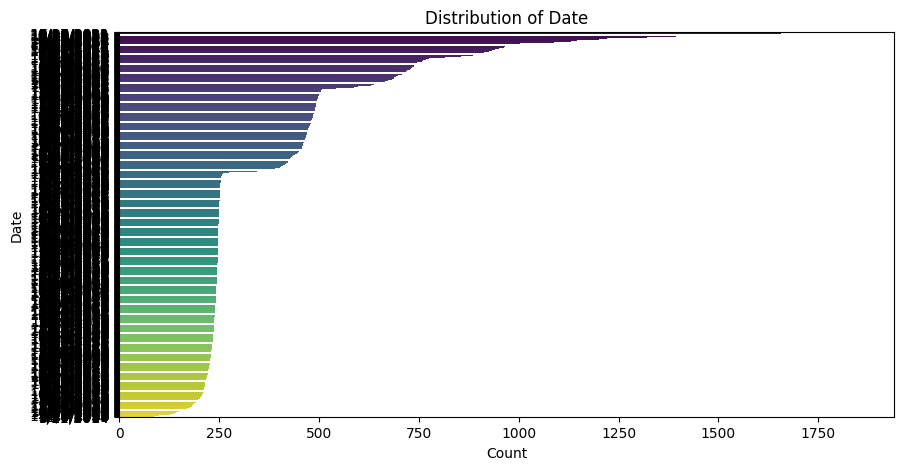

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


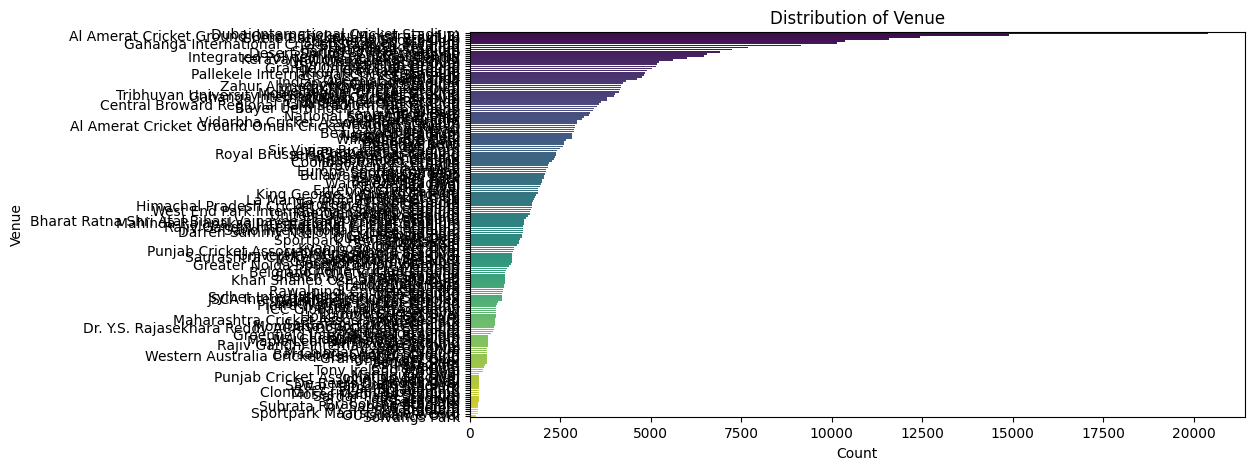

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


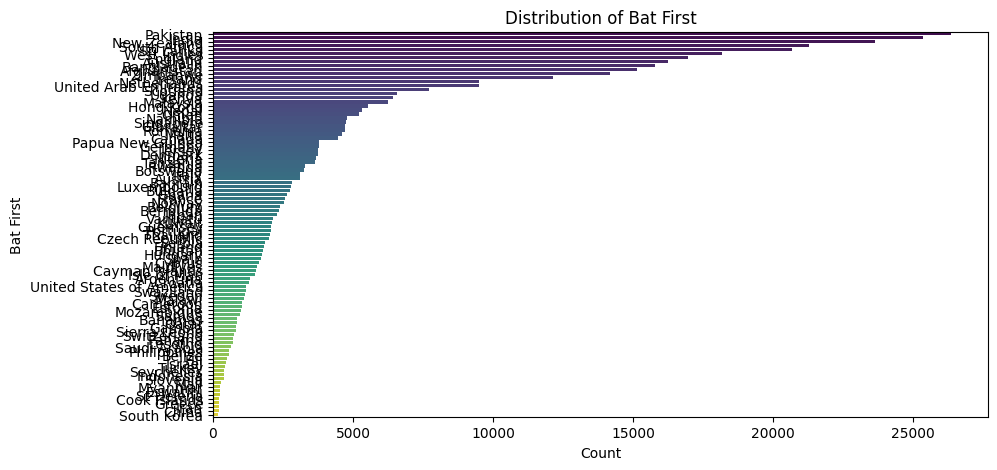

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


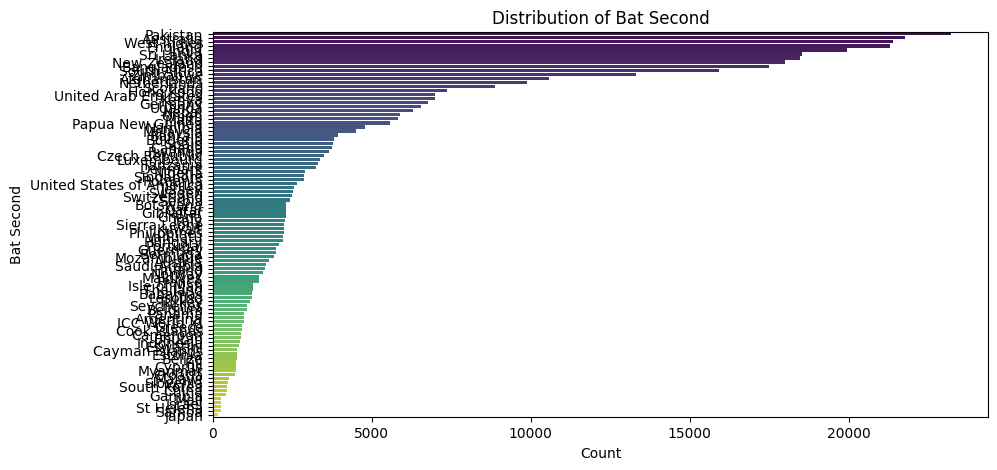

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


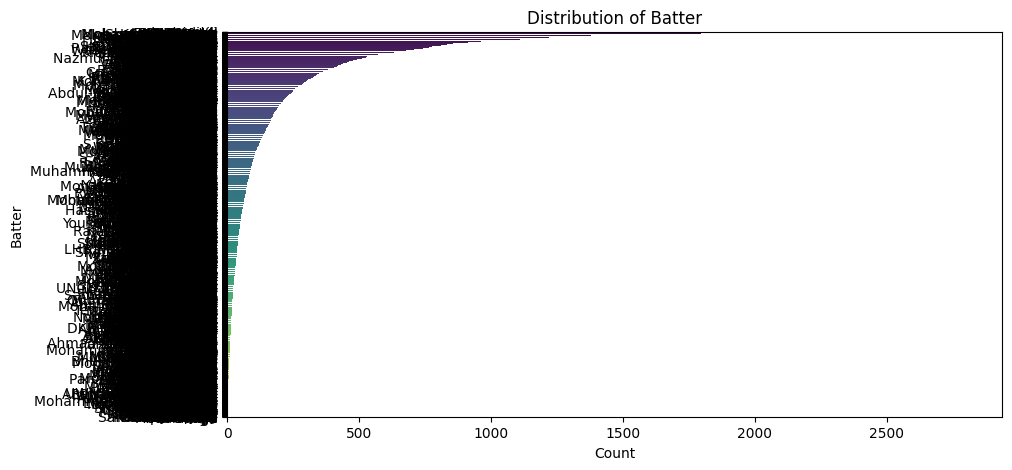

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


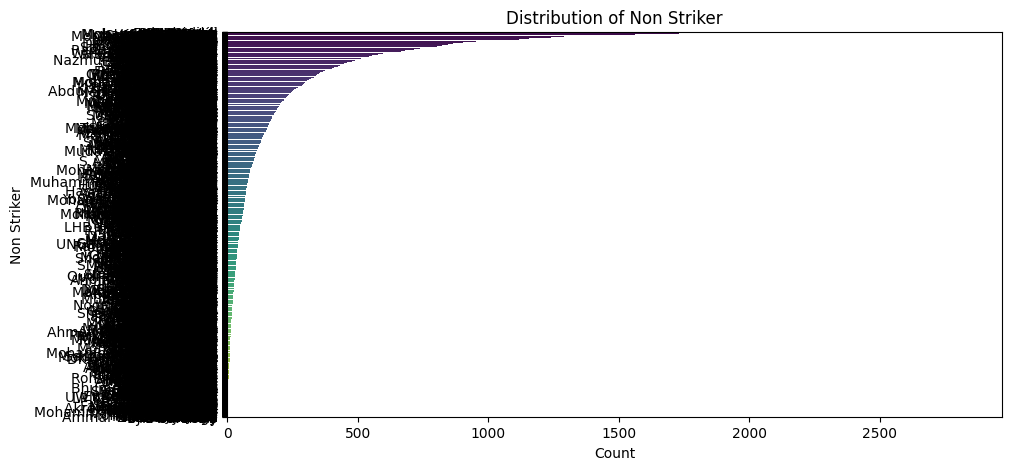

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


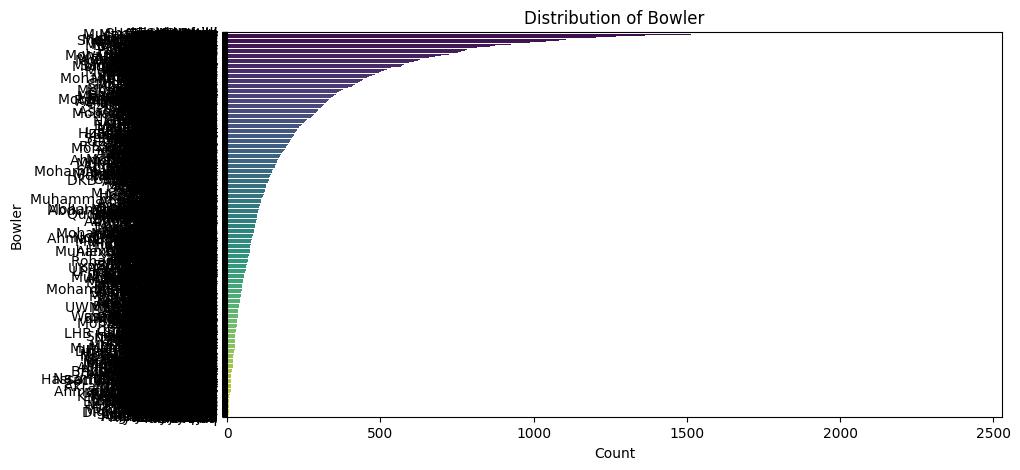

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


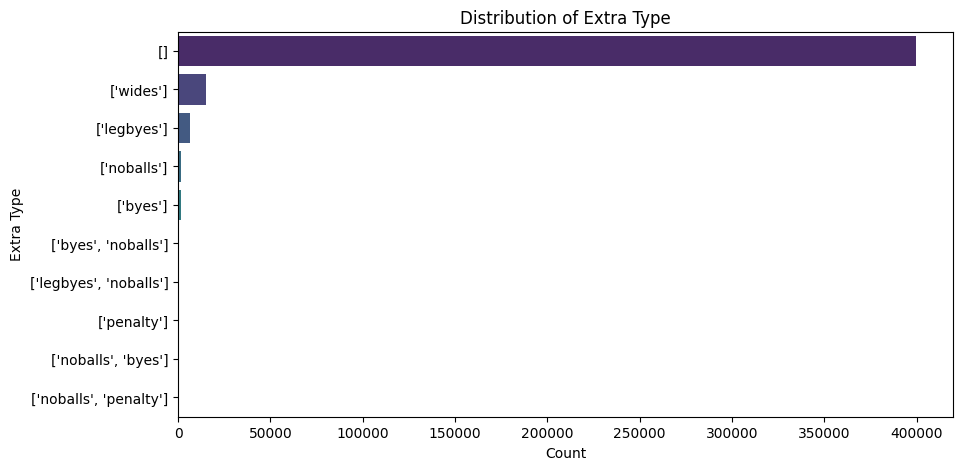

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


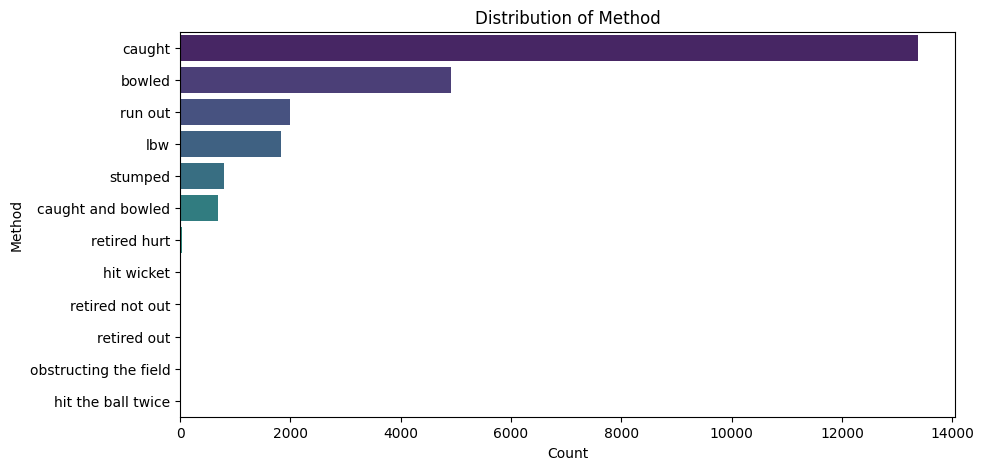

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


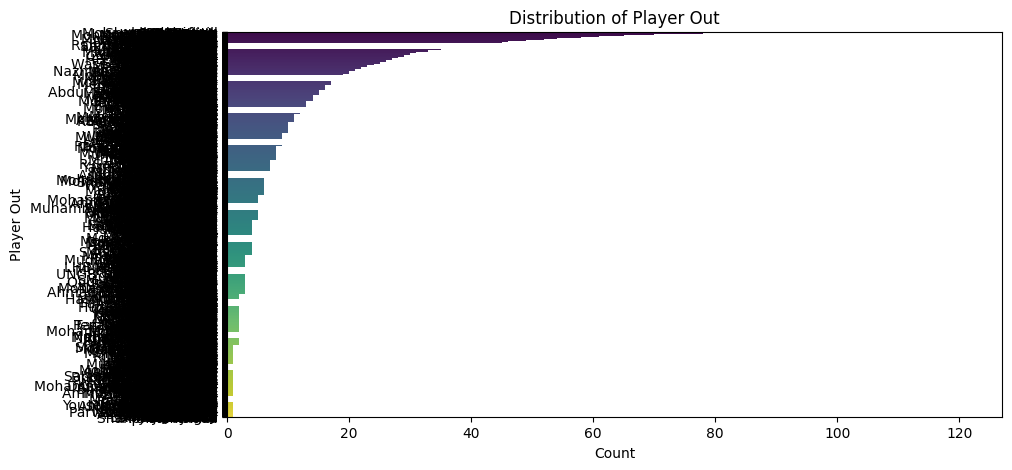

C:\Users\Ir\AppData\Local\Temp\ipykernel_13304\3635471658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


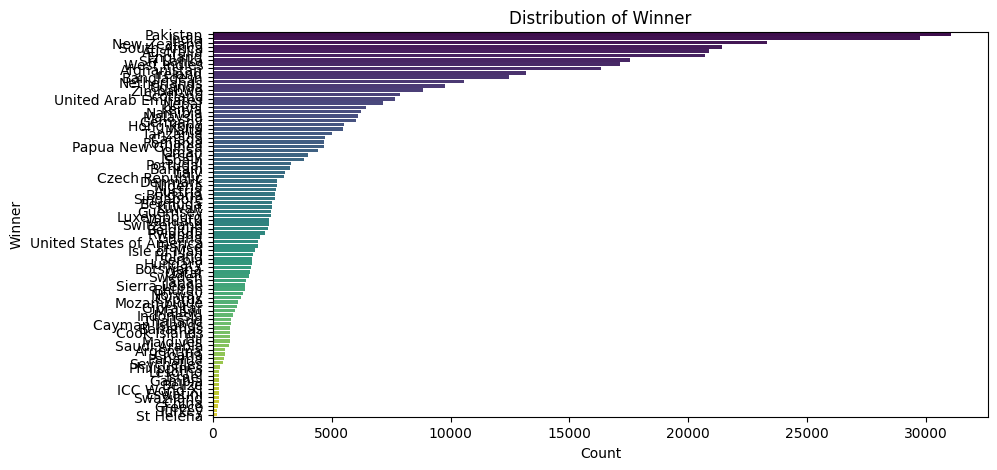

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

For Numeric Columns

In [9]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

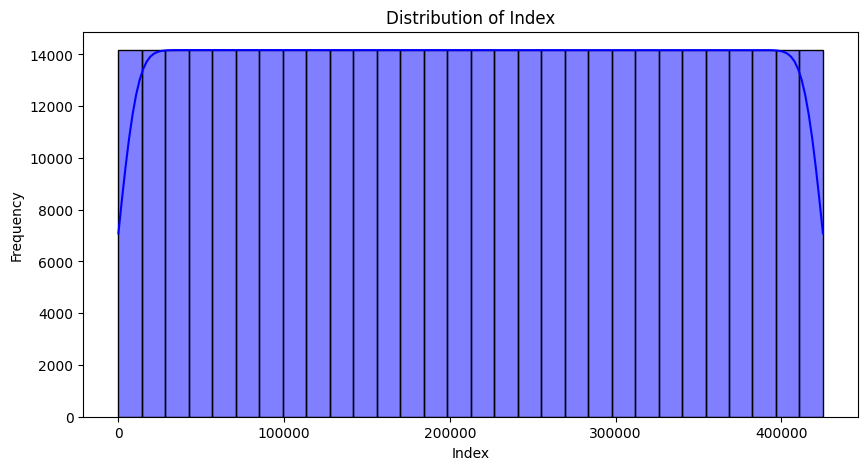

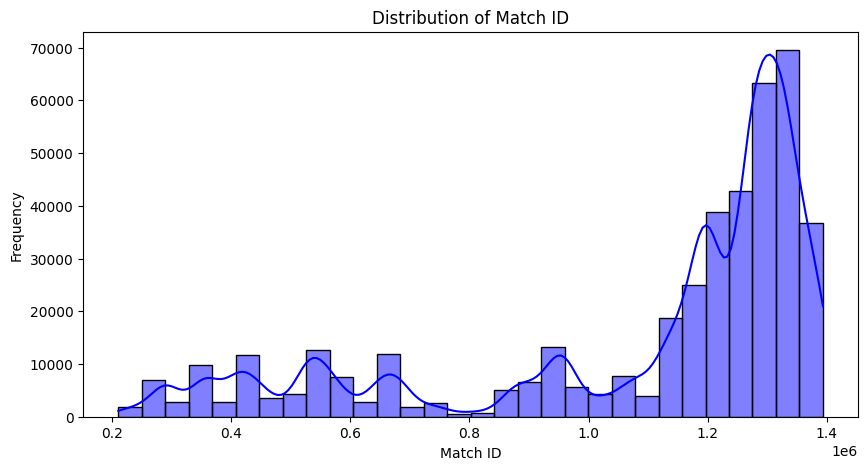

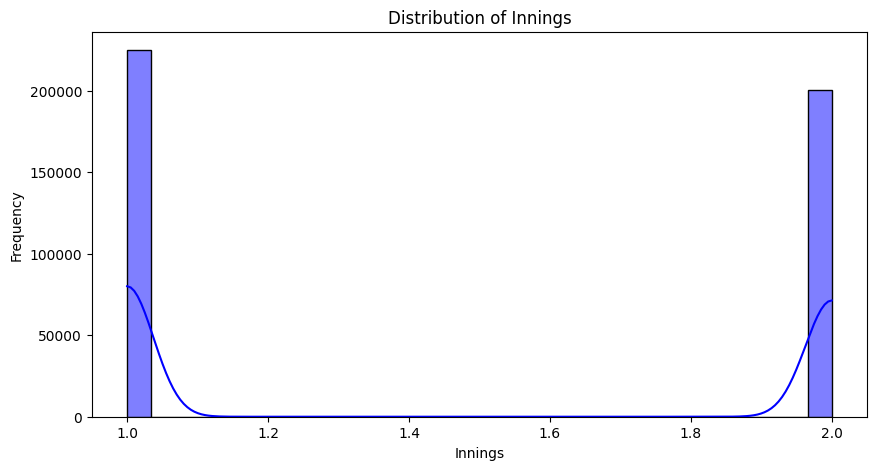

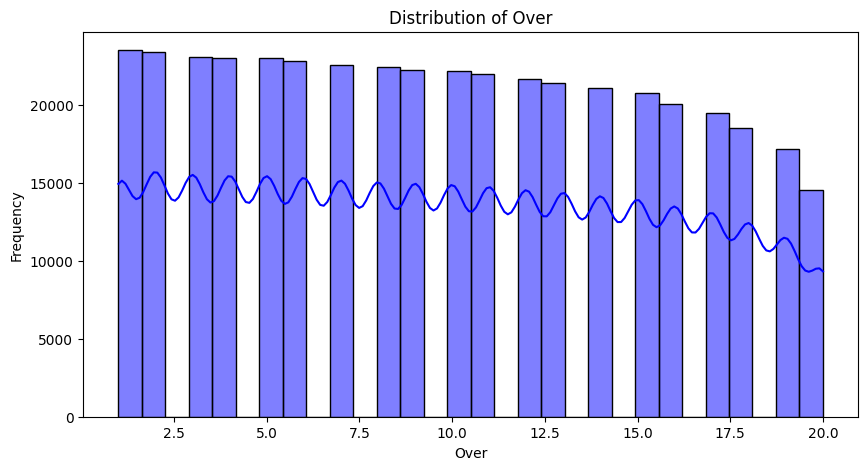

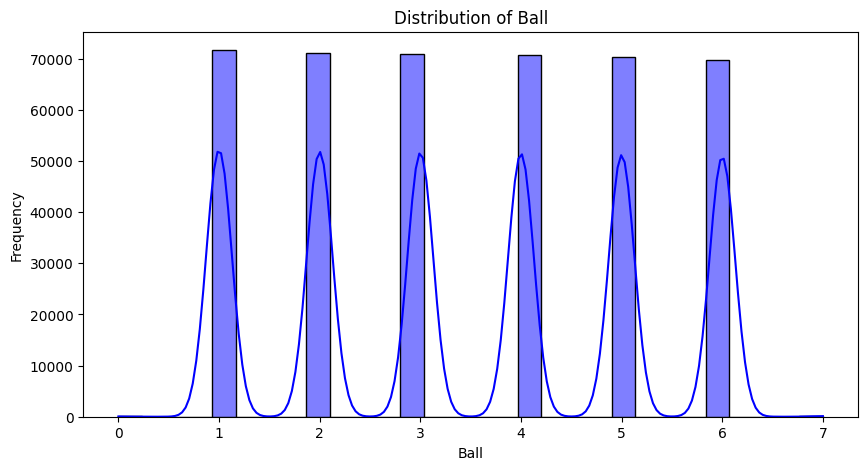

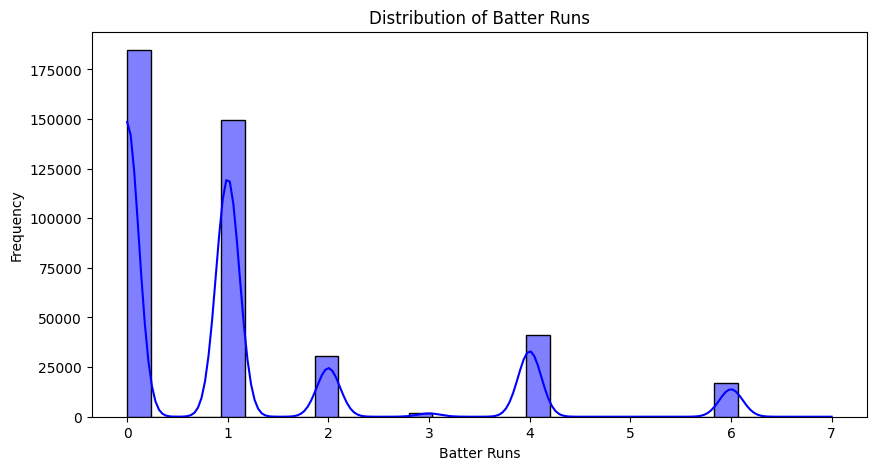

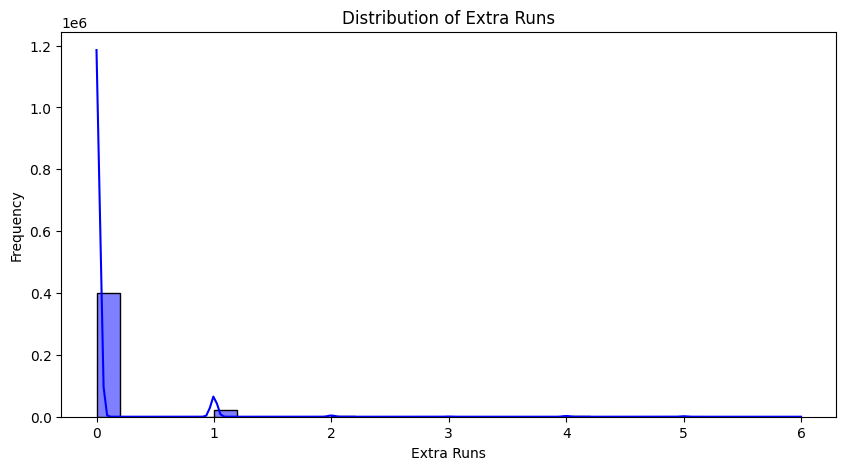

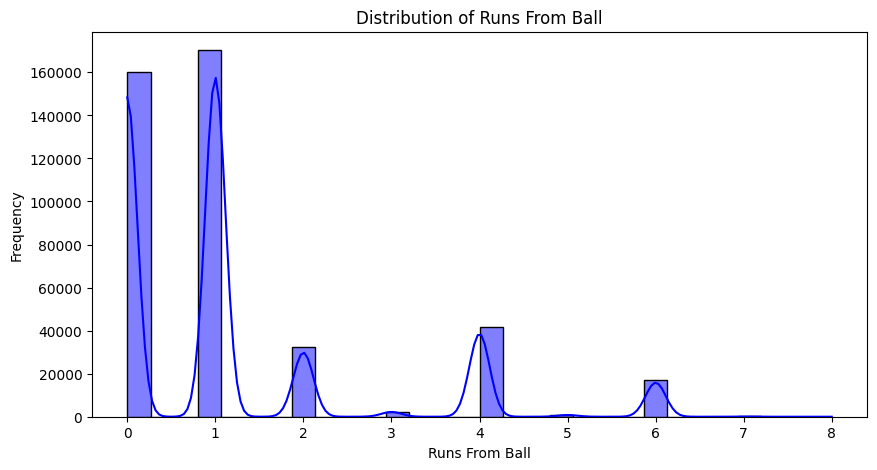

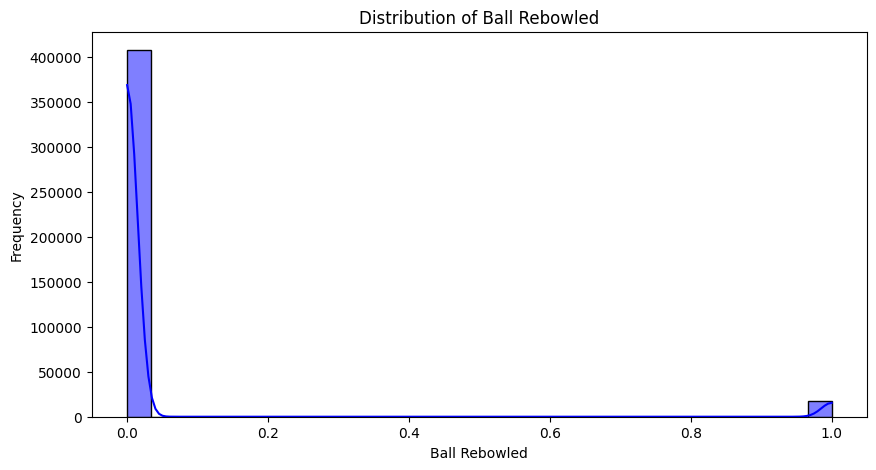

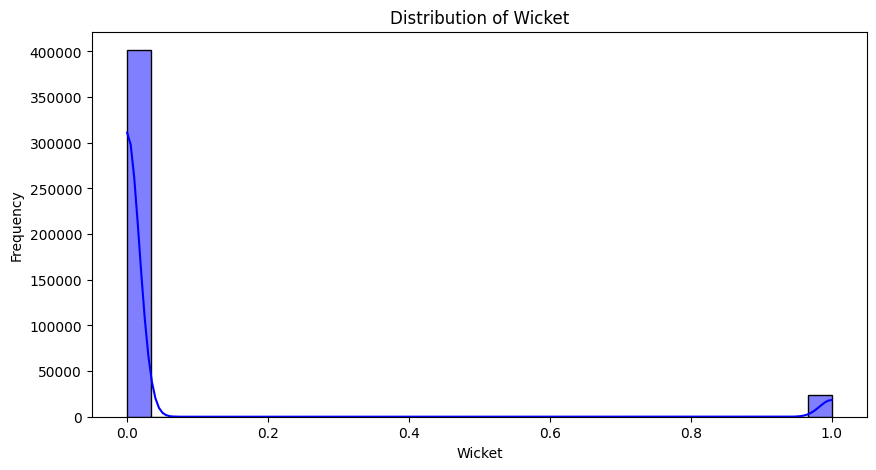

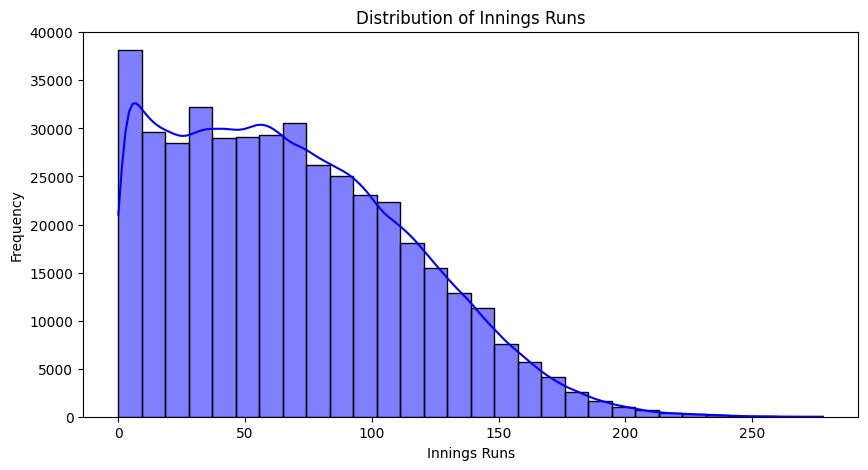

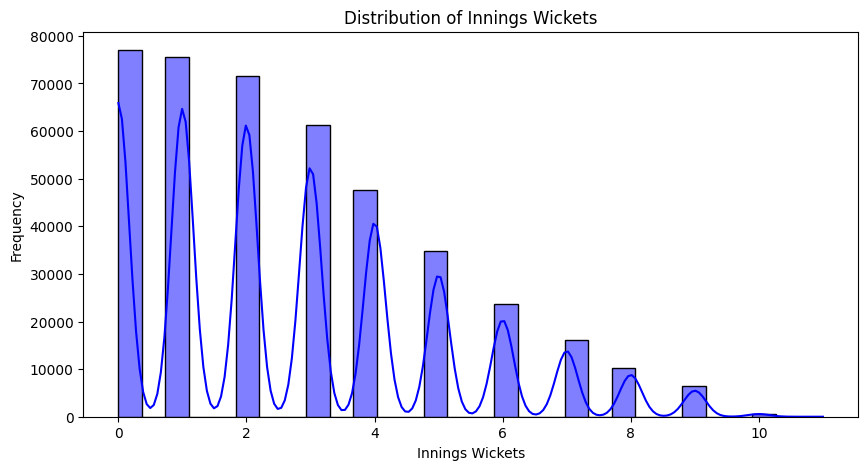

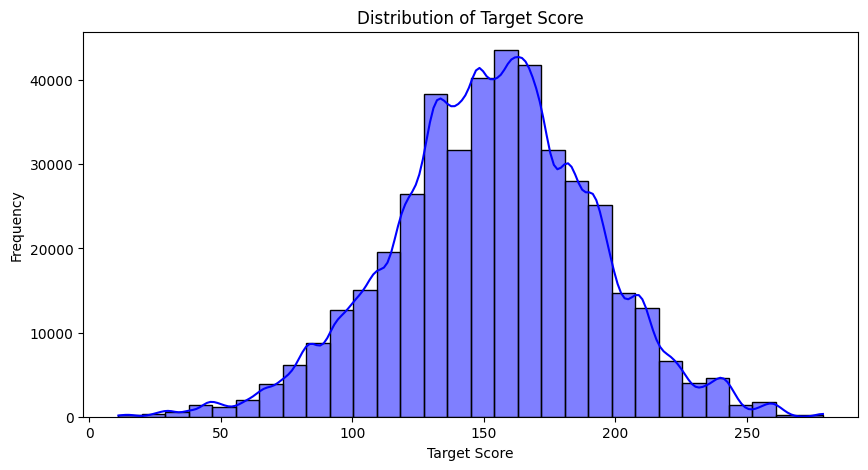

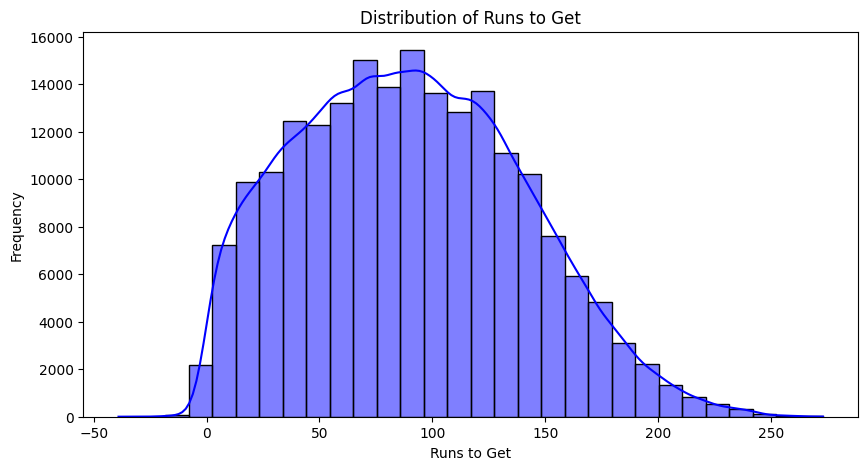

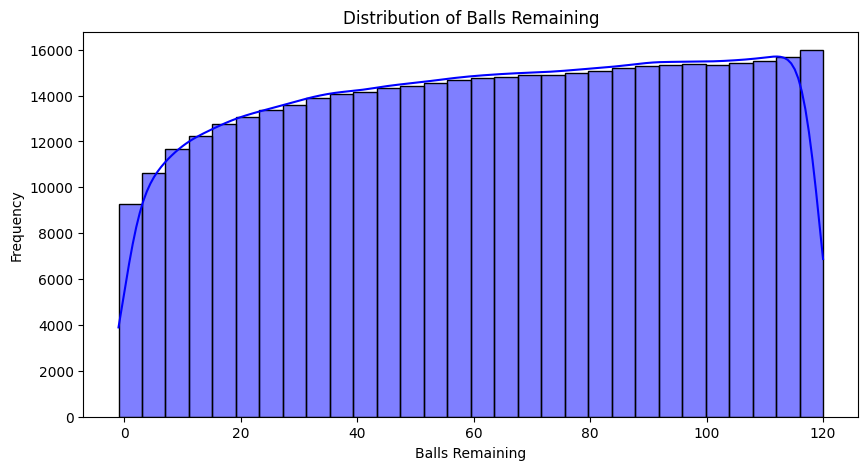

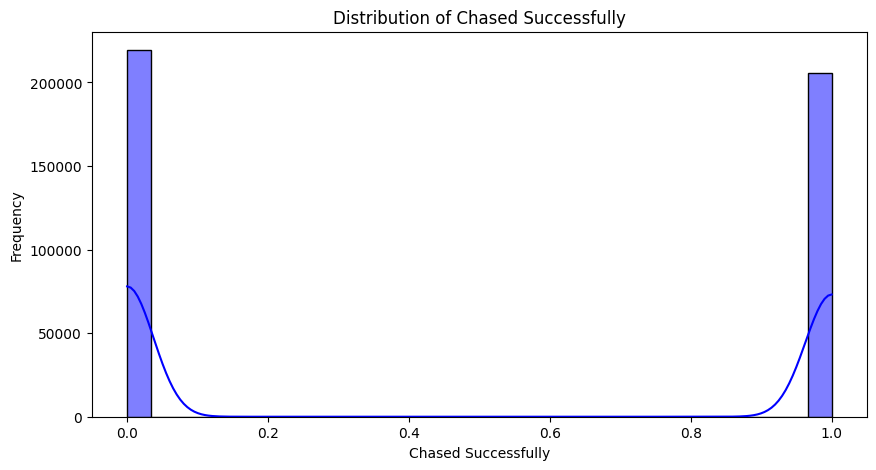

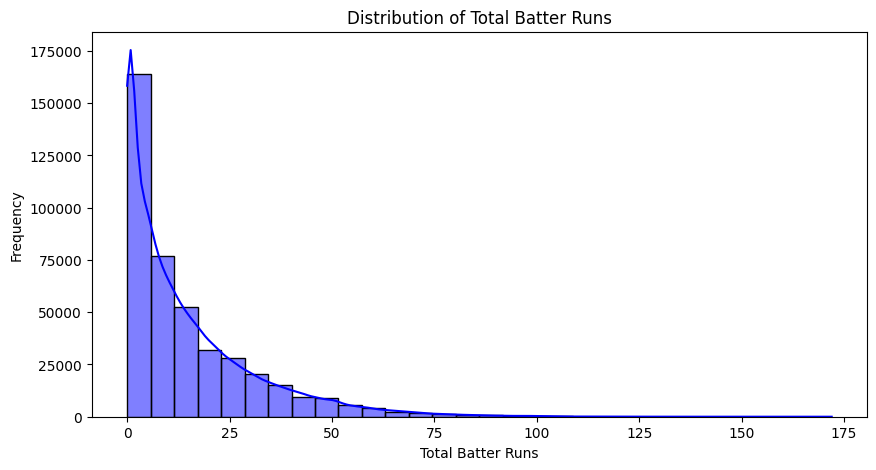

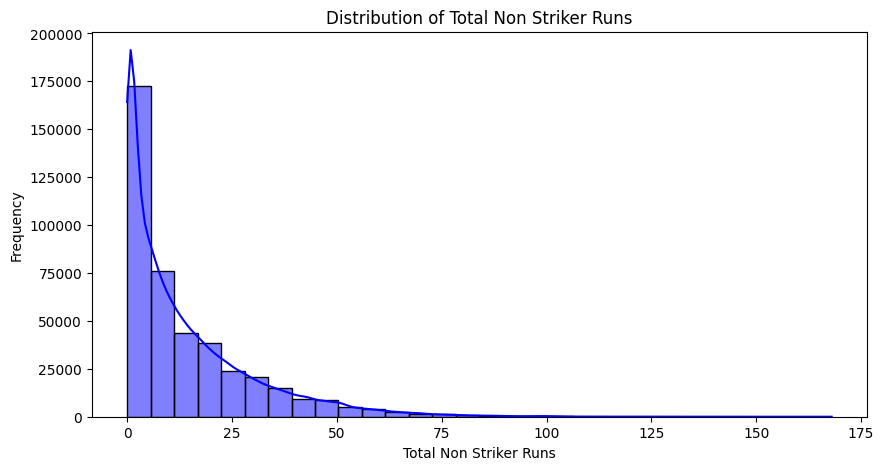

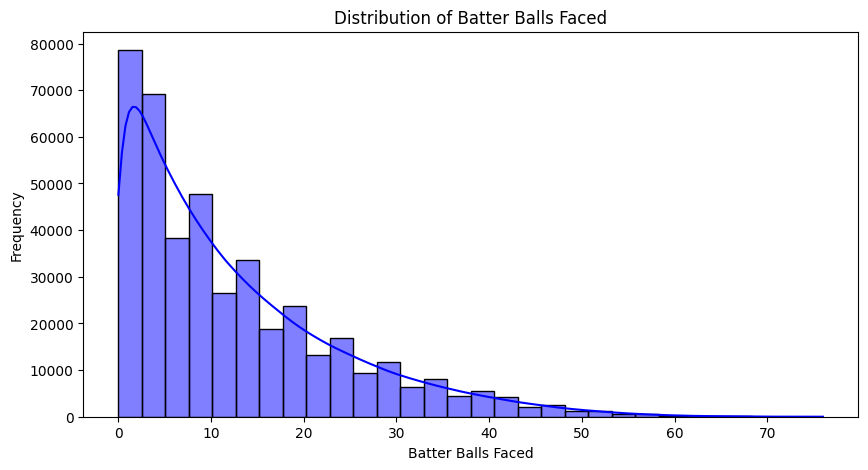

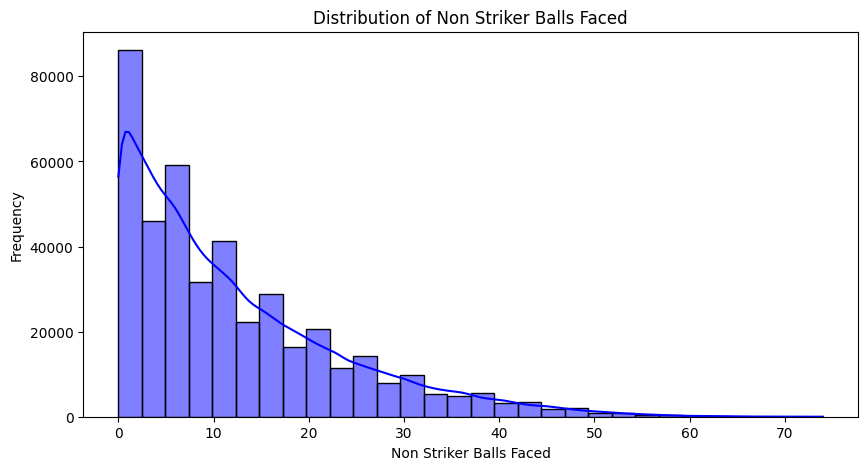

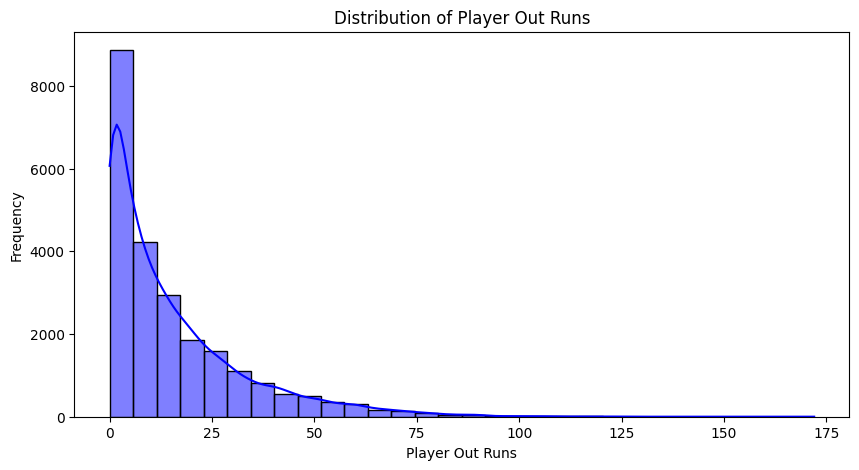

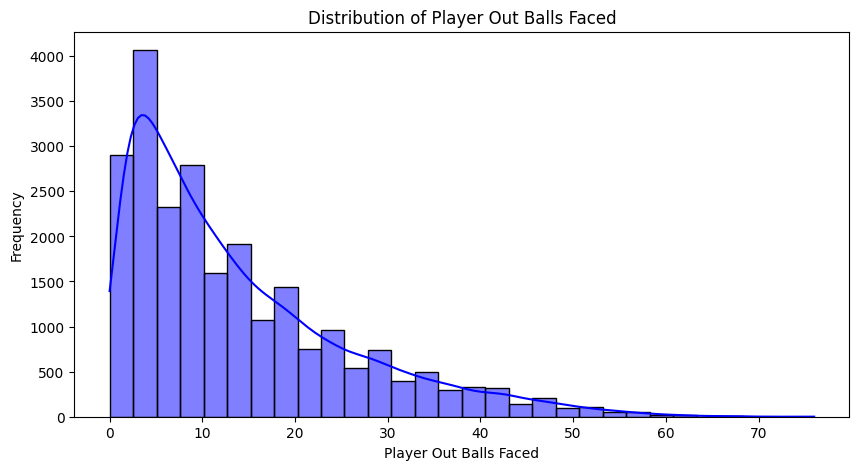

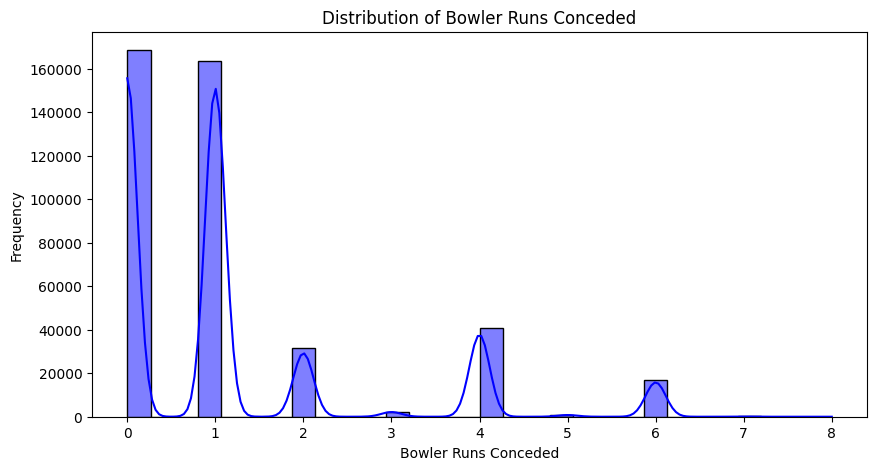

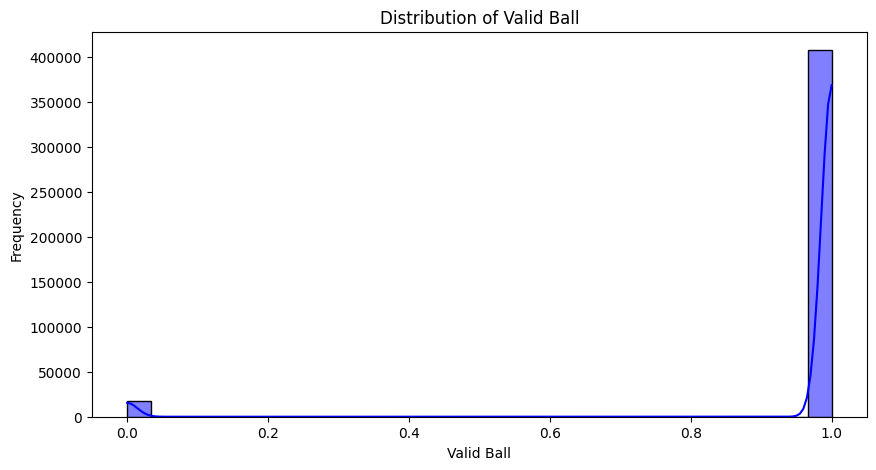

In [10]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**DATA CLEANING**

In [7]:
(df.isnull().sum()/df.shape[0])*100

Index                       0.000000
Match ID                    0.000000
Date                        0.000000
Venue                       0.000000
Bat First                   0.000000
Bat Second                  0.000000
Innings                     0.000000
Over                        0.000000
Ball                        0.000000
Batter                      0.000000
Non Striker                 0.000000
Bowler                      0.000000
Batter Runs                 0.000000
Extra Runs                  0.000000
Runs From Ball              0.000000
Ball Rebowled               0.000000
Extra Type                  0.000000
Wicket                      0.000000
Method                     94.434735
Player Out                 94.434735
Innings Runs                0.000000
Innings Wickets             0.000000
Target Score                0.000000
Runs to Get                52.882840
Balls Remaining             0.000000
Winner                      0.000000
Chased Successfully         0.000000
T

Dropping Features with 70% or more null values 

In [8]:
df=pd.read_csv('ball_by_ball_it20.csv')

for i in df.columns:
    if((df[i].isnull().sum()/df.shape[0])*100>70):
        df.drop(i,inplace=True,axis=1)

In [9]:
df.shape

(425119, 31)

In [10]:
df.columns

Index(['Index', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Innings Runs', 'Innings Wickets',
       'Target Score', 'Runs to Get', 'Balls Remaining', 'Winner',
       'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs',
       'Batter Balls Faced', 'Non Striker Balls Faced', 'Bowler Runs Conceded',
       'Valid Ball'],
      dtype='object')

In [11]:
df.isnull().sum().sum()

224815

In [12]:
df.isnull().sum()

Index                           0
Match ID                        0
Date                            0
Venue                           0
Bat First                       0
Bat Second                      0
Innings                         0
Over                            0
Ball                            0
Batter                          0
Non Striker                     0
Bowler                          0
Batter Runs                     0
Extra Runs                      0
Runs From Ball                  0
Ball Rebowled                   0
Extra Type                      0
Wicket                          0
Innings Runs                    0
Innings Wickets                 0
Target Score                    0
Runs to Get                224815
Balls Remaining                 0
Winner                          0
Chased Successfully             0
Total Batter Runs               0
Total Non Striker Runs          0
Batter Balls Faced              0
Non Striker Balls Faced         0
Bowler Runs Co

In [13]:
null_columns=[]
for i in df.columns:
    if df[i].isnull().sum() != 0 :
        null_columns.append(i)

In [14]:
null_columns

['Runs to Get']

<Axes: xlabel='Runs to Get', ylabel='Count'>

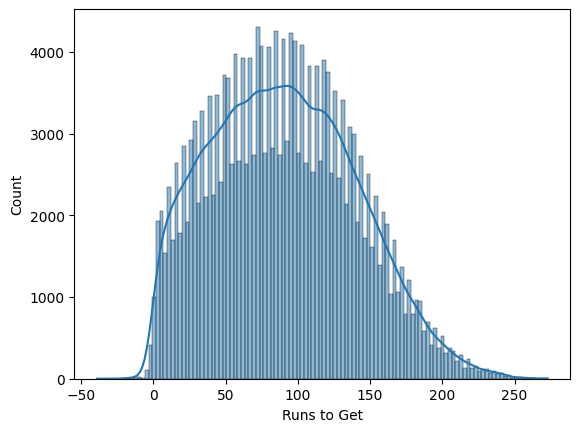

In [19]:
sns.histplot(x=df['Runs to Get'],kde=True)

Since 'Runs to Get' is normally distributed (no skewness) the mean will be best to fill the null values with

In [15]:
mean_value = df['Runs to Get'].mean()
# Fill null values with the mean
df['Runs to Get'].fillna(mean_value, inplace=True)

C:\Users\Ir\AppData\Local\Temp\ipykernel_8992\2101970707.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Runs to Get'].fillna(mean_value, inplace=True)


In [16]:
df['Runs to Get'].isnull().sum()

0

In [17]:
df.isnull().sum().sum()

0

Dropping Duplicates as Data is so Big 

In [18]:
df = df.drop_duplicates()
print("Number of duplicate rows after removal:", df.duplicated().sum())


Number of duplicate rows after removal: 0


In [19]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df


for col in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers_iqr(df, col)

print("Outliers removed from numerical columns.")


Outliers removed from numerical columns.


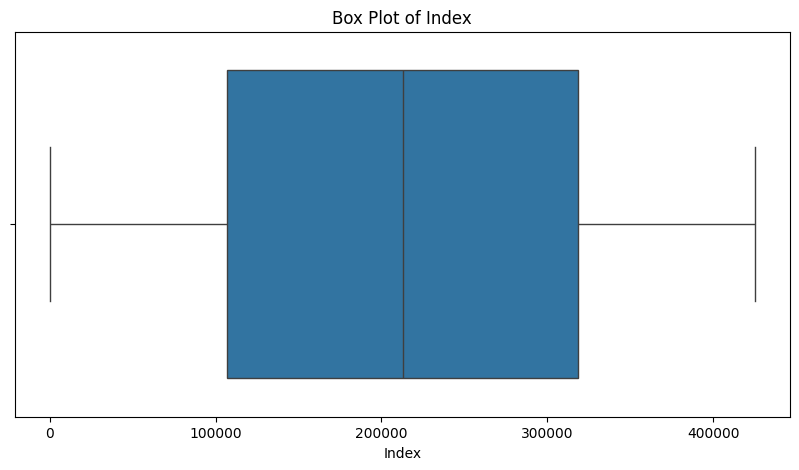

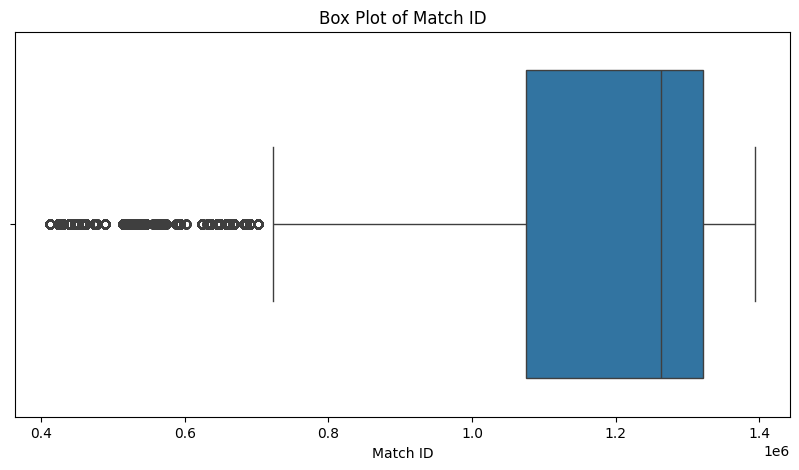

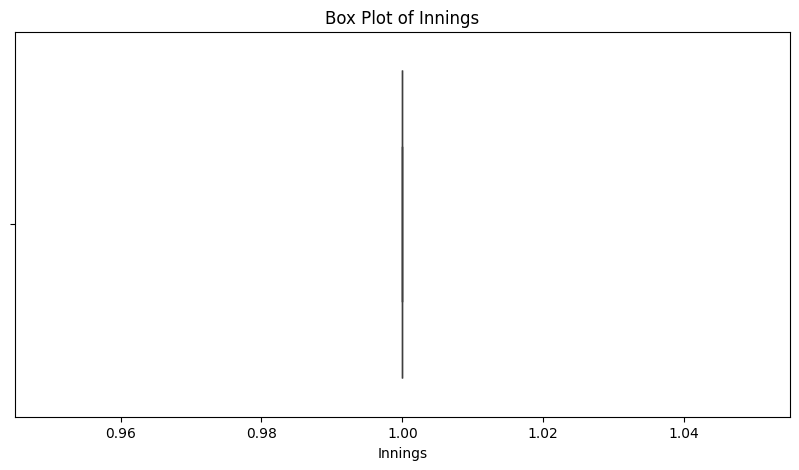

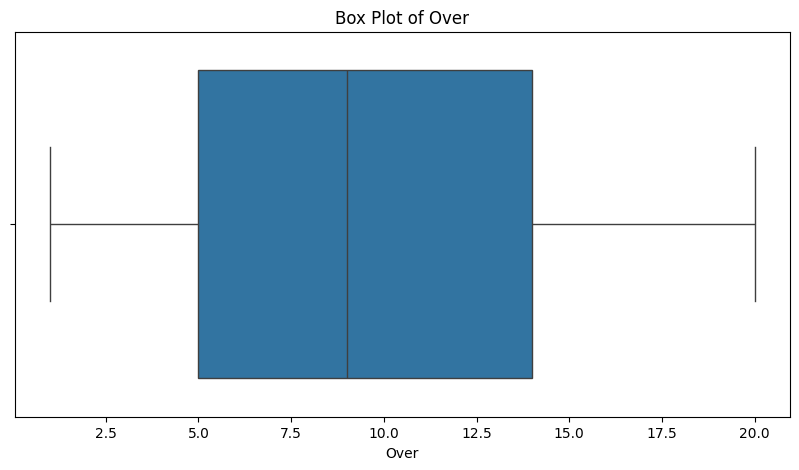

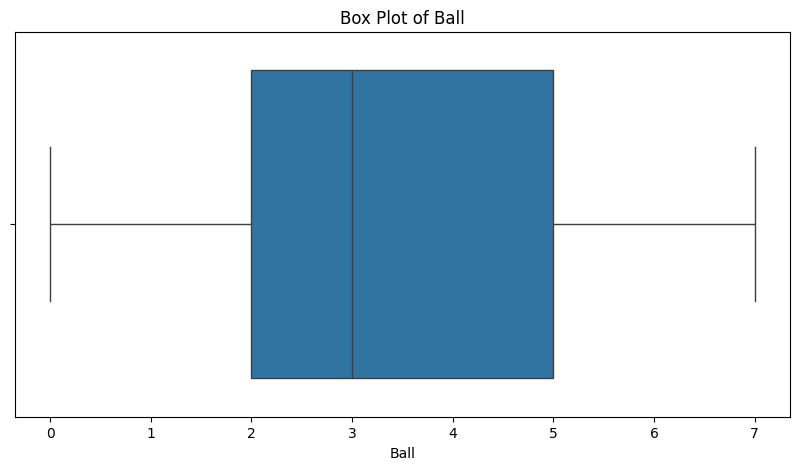

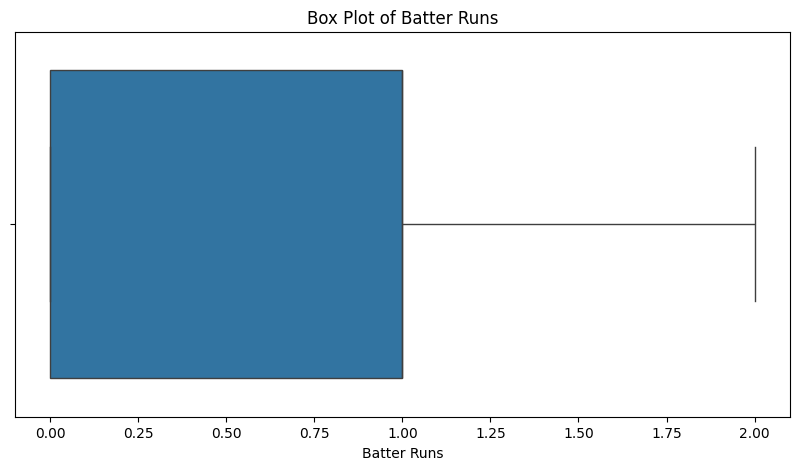

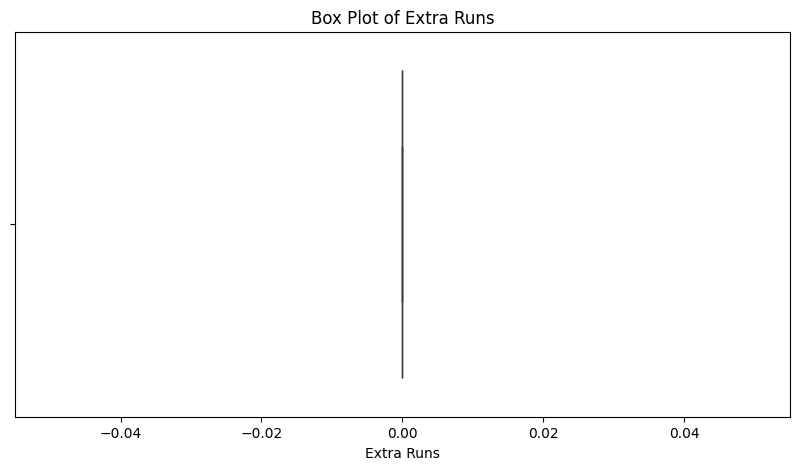

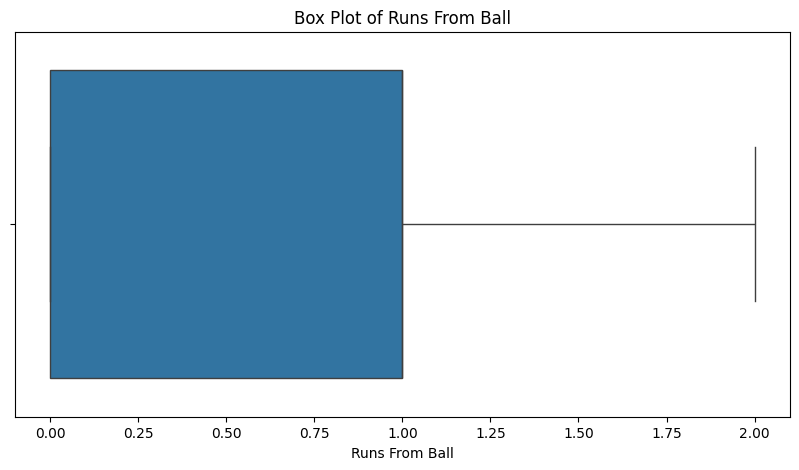

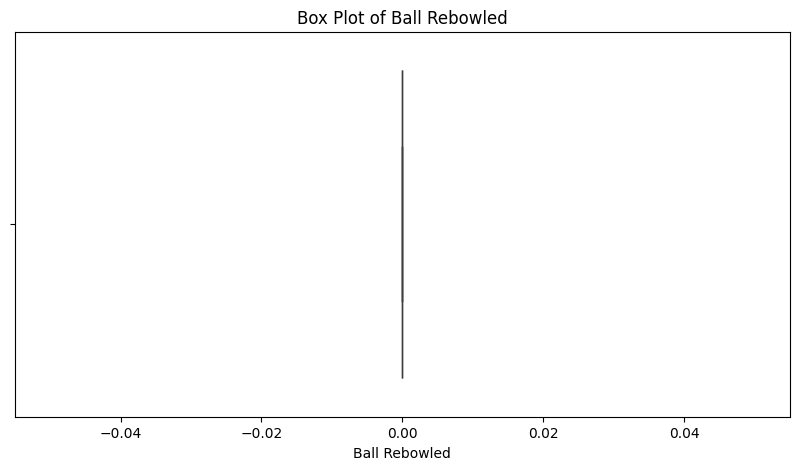

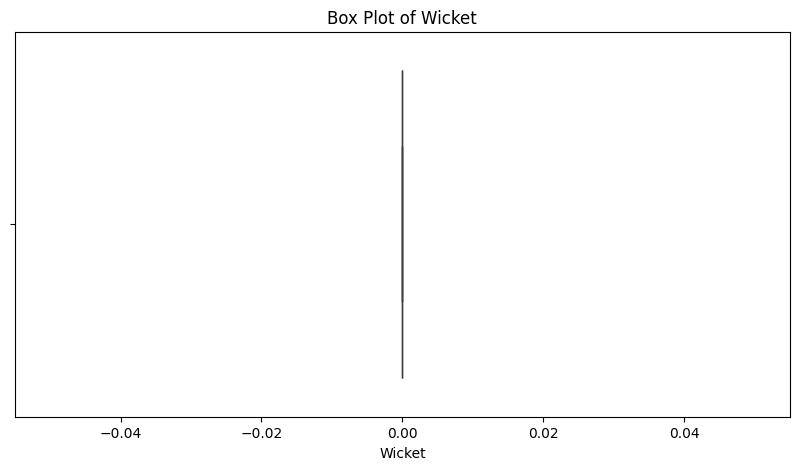

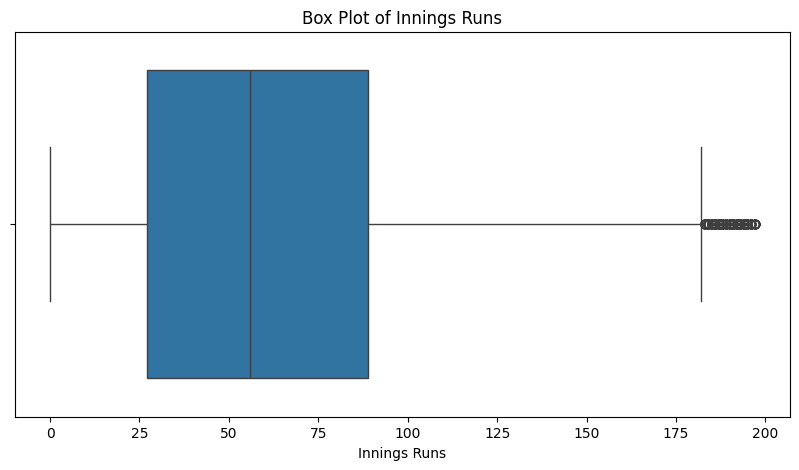

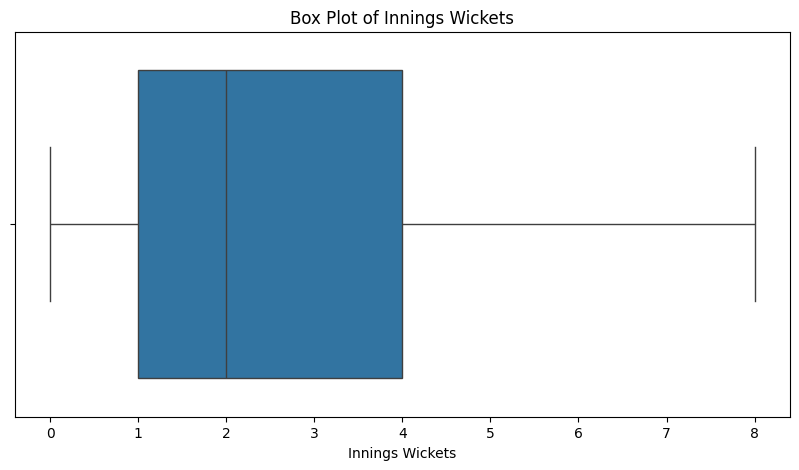

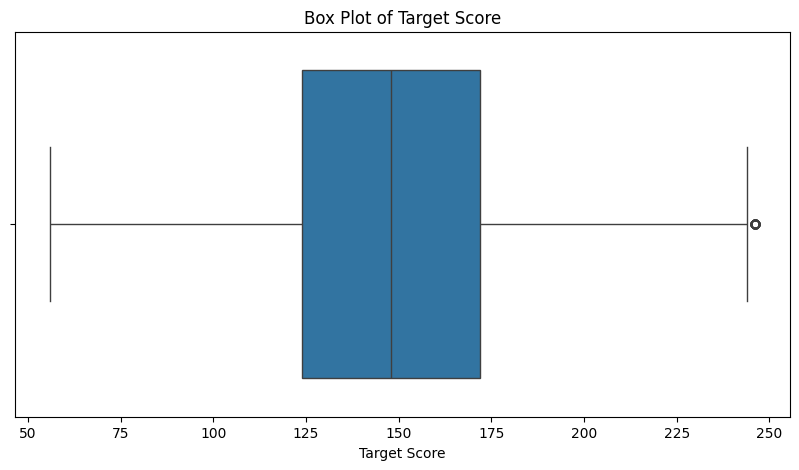

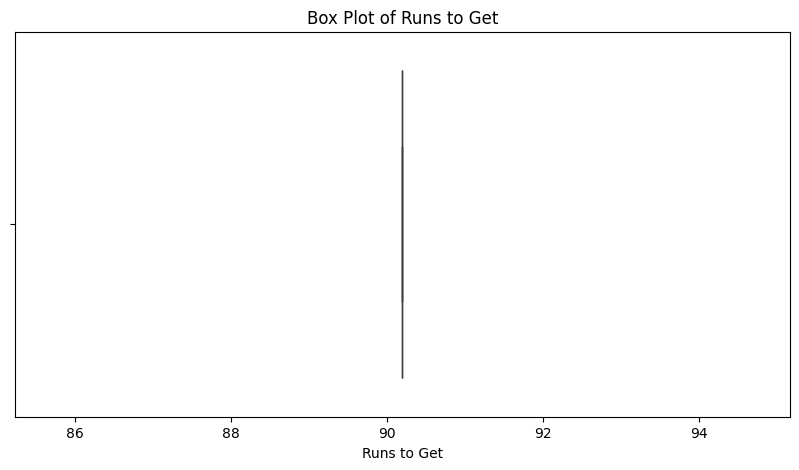

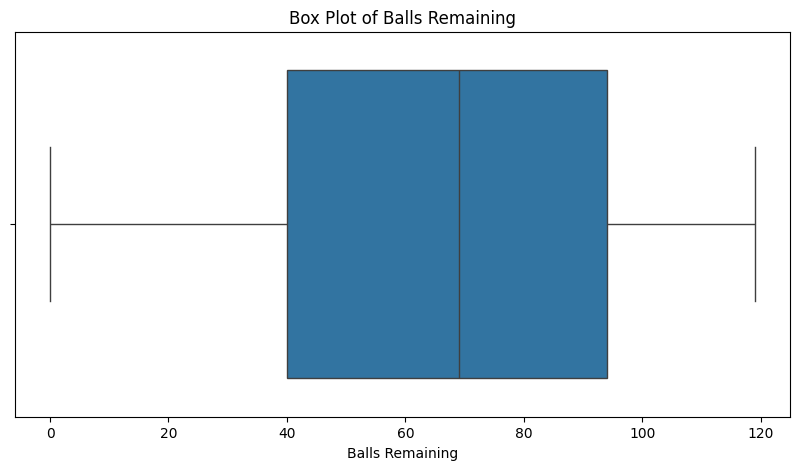

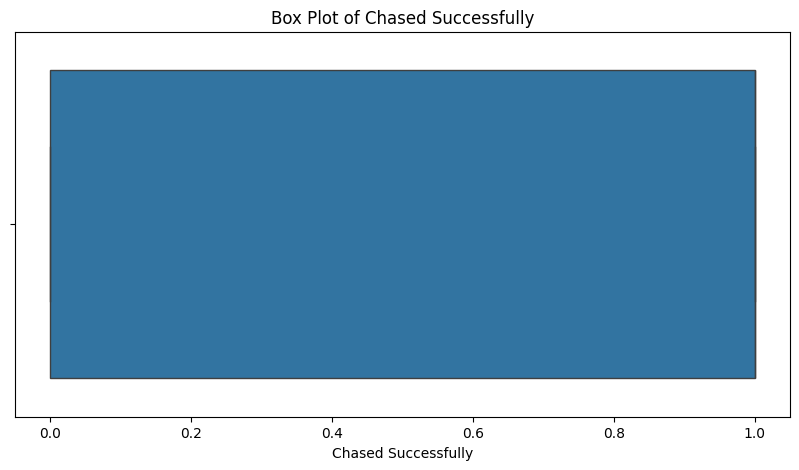

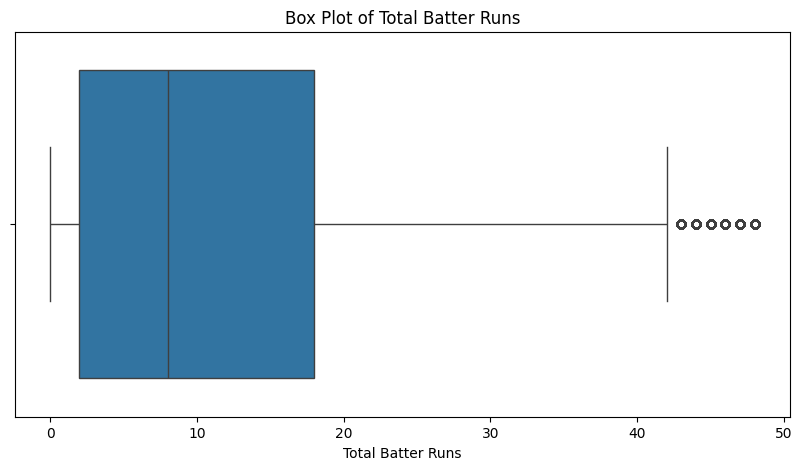

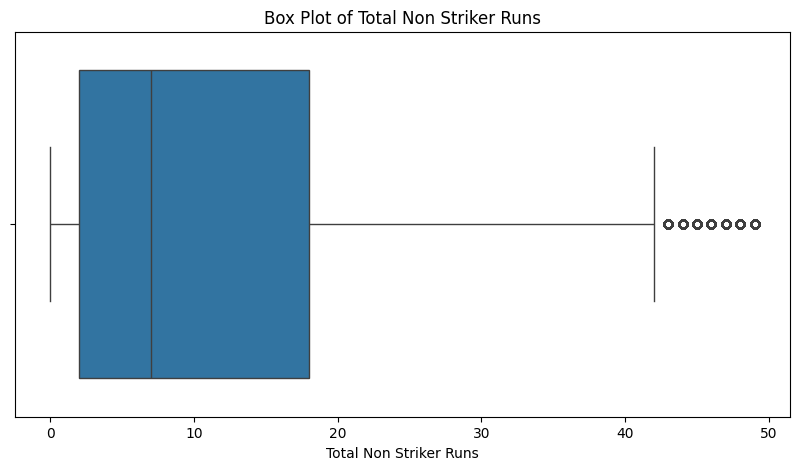

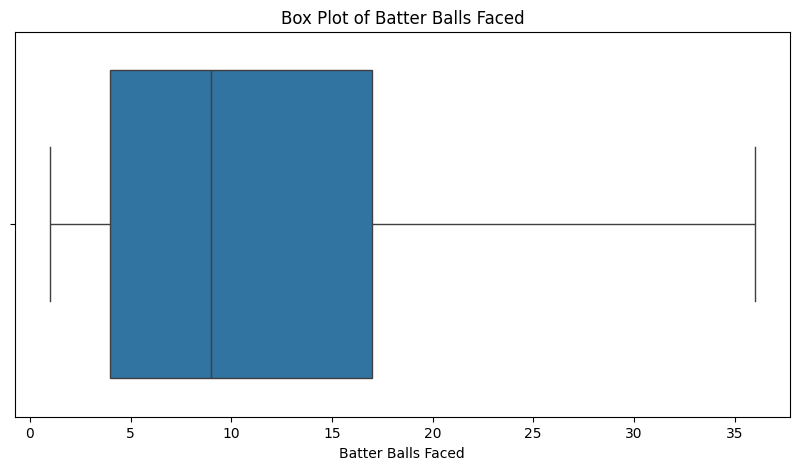

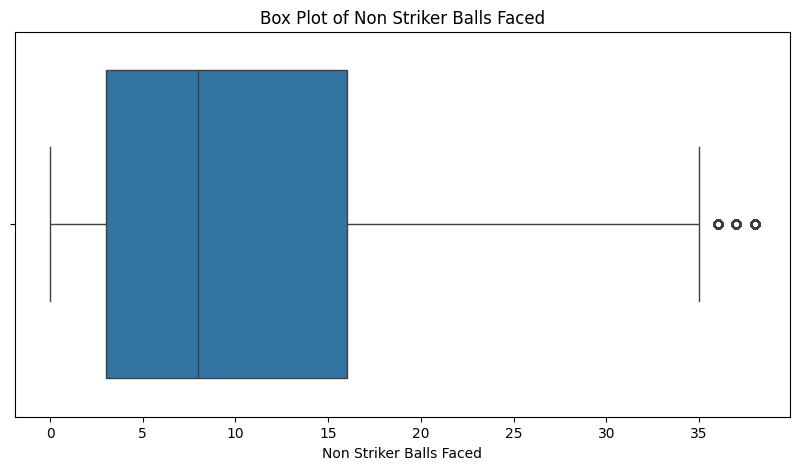

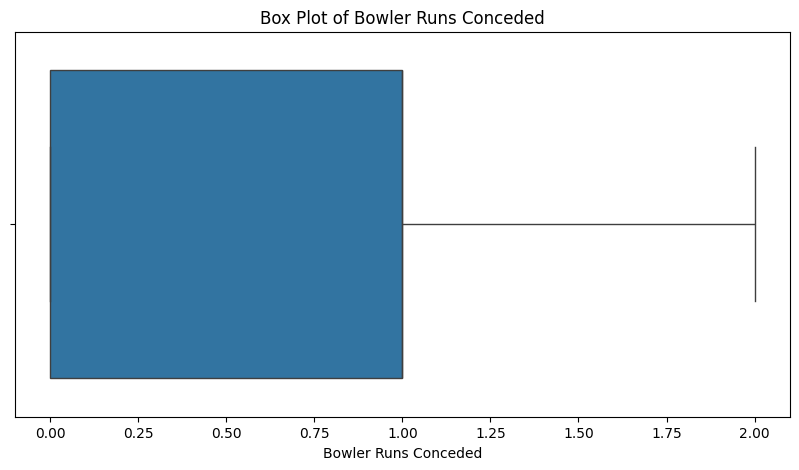

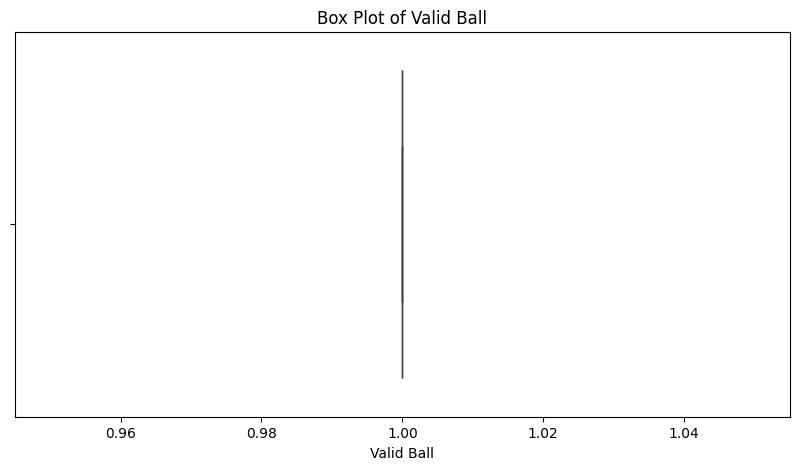

In [25]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [20]:
# Function to cap extreme values at the lower and upper bound
def cap_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at the bounds
    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping to all numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    df = cap_outliers(df, col)

print("Extreme values capped in numerical columns.")


Extreme values capped in numerical columns.


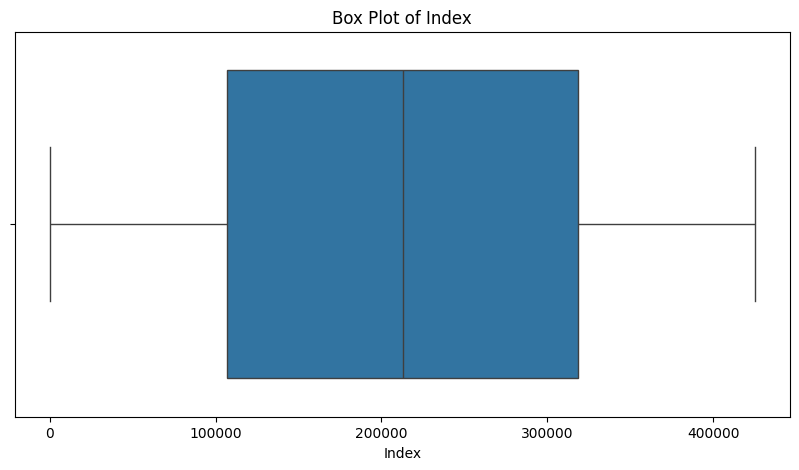

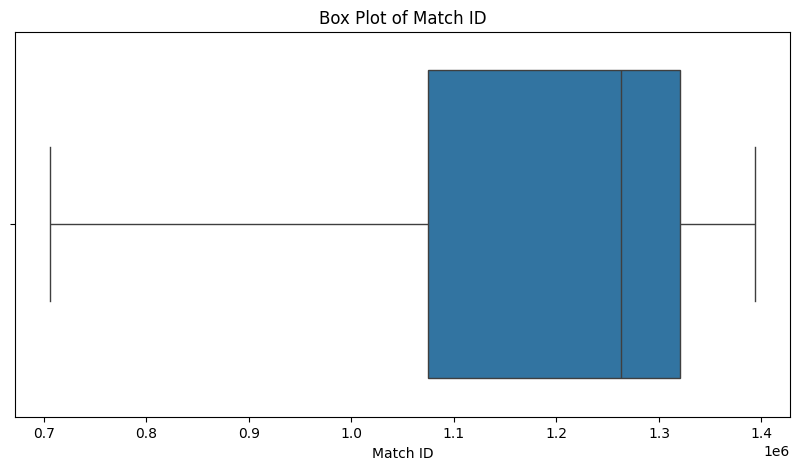

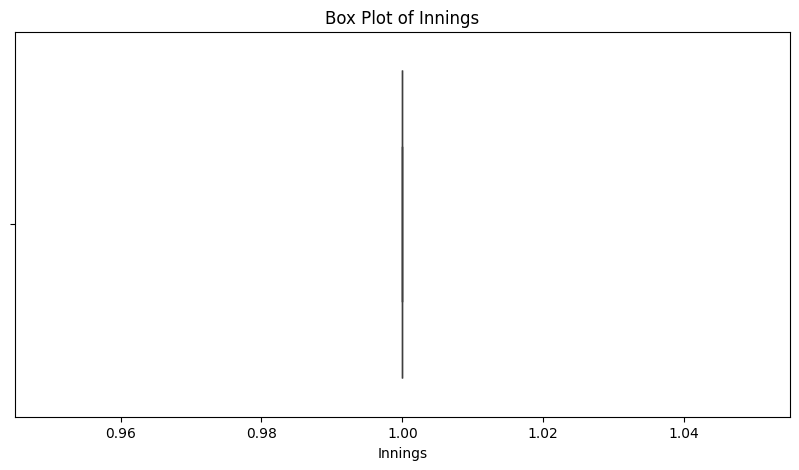

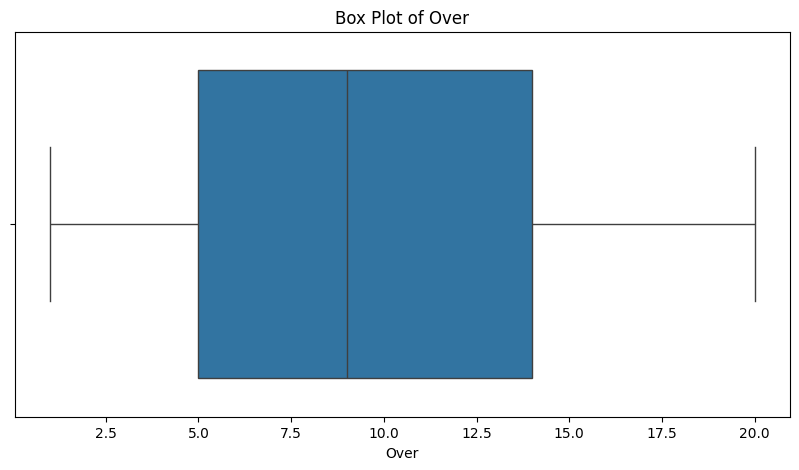

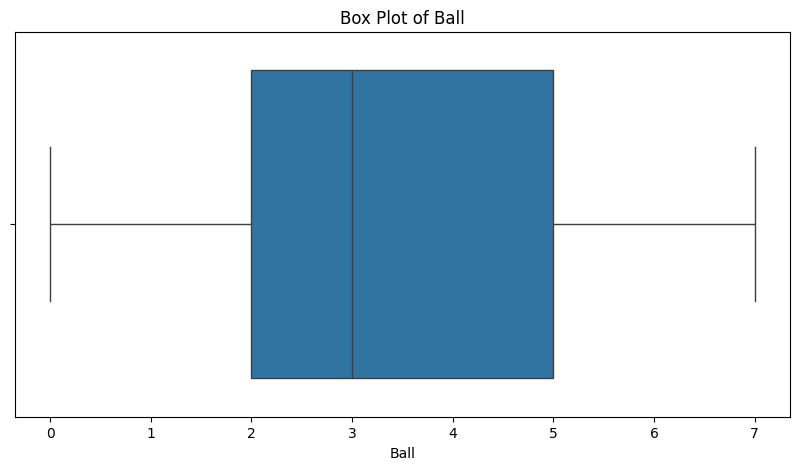

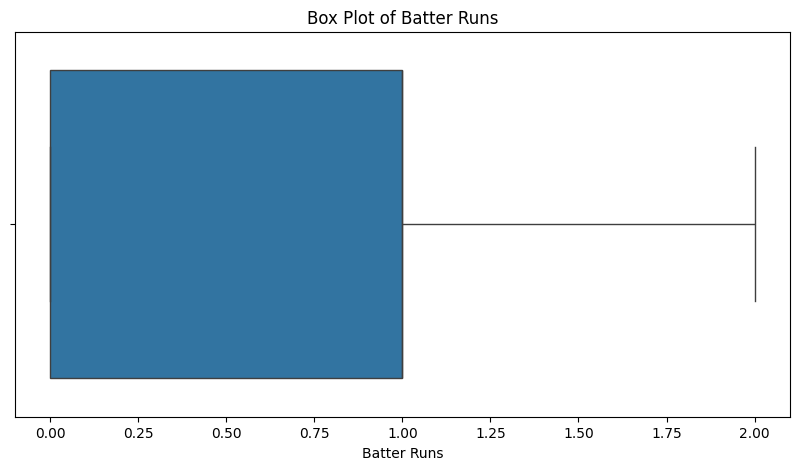

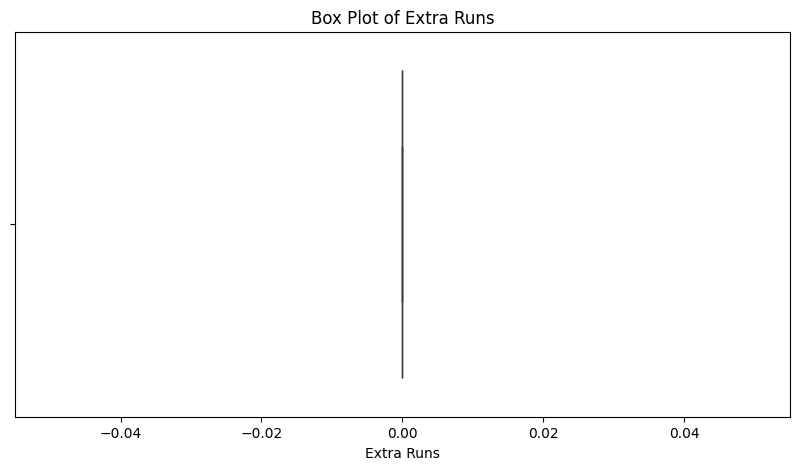

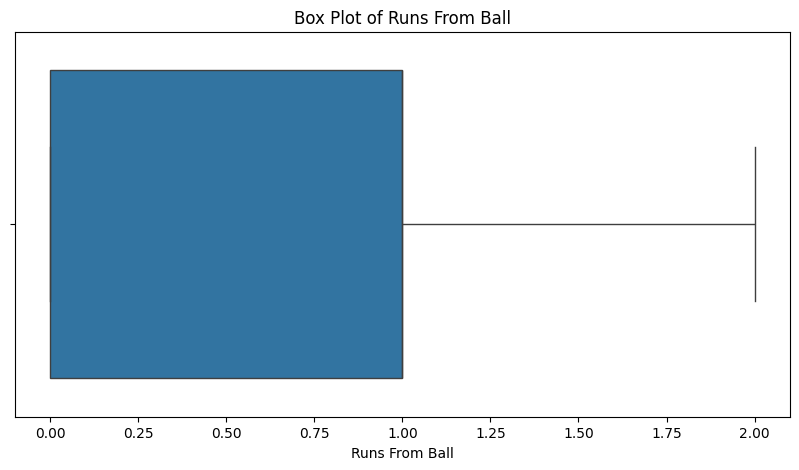

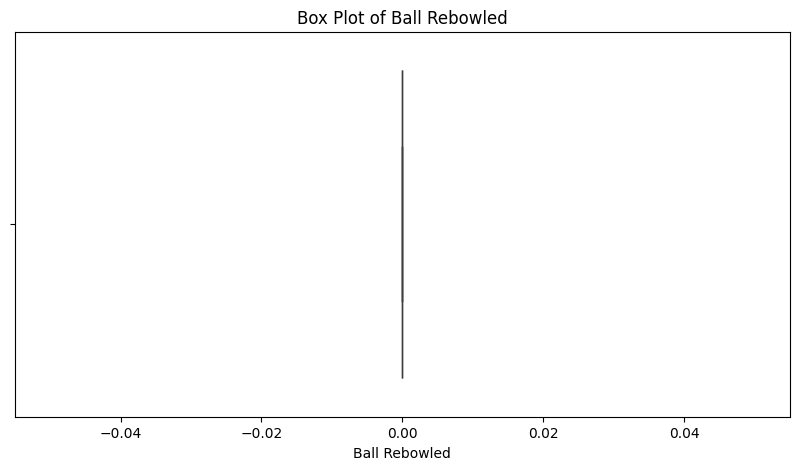

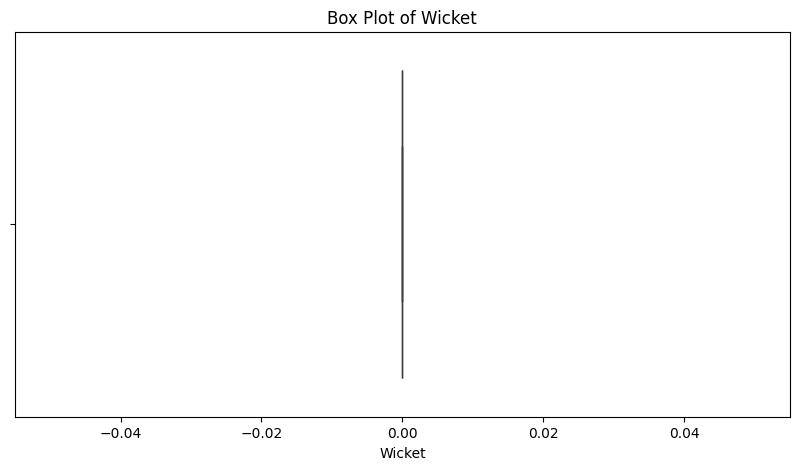

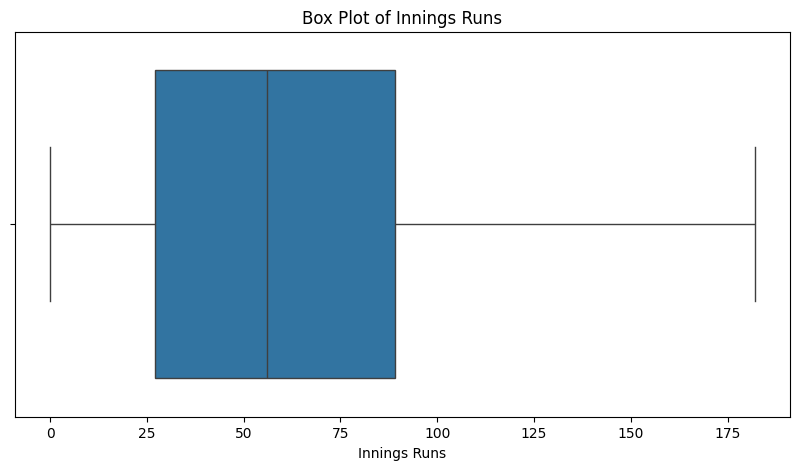

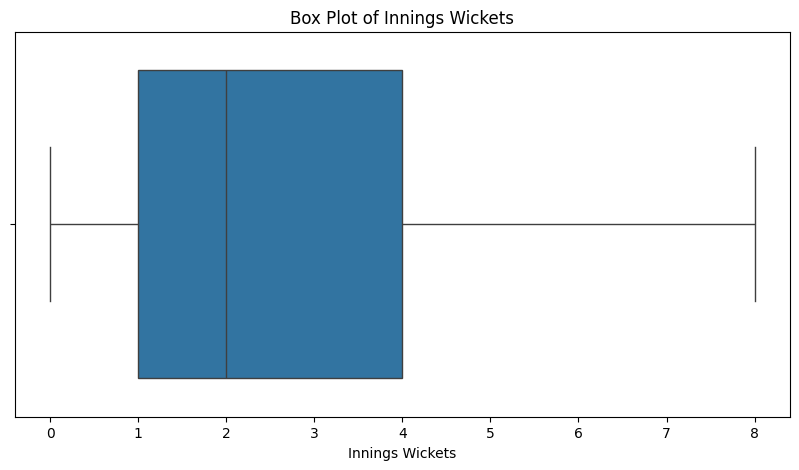

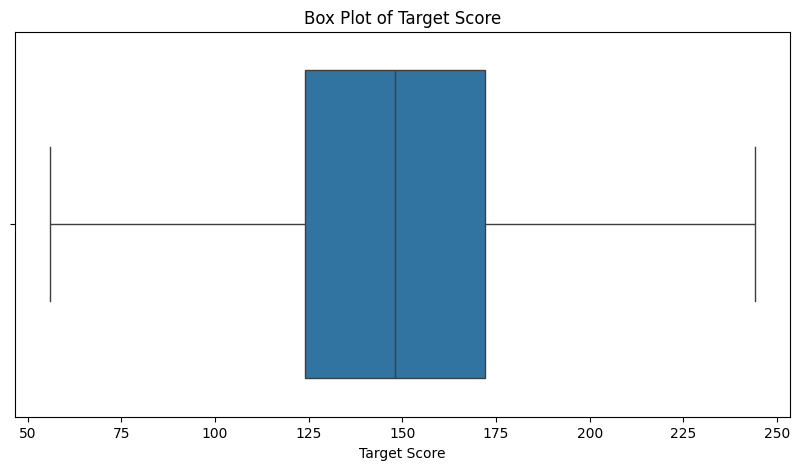

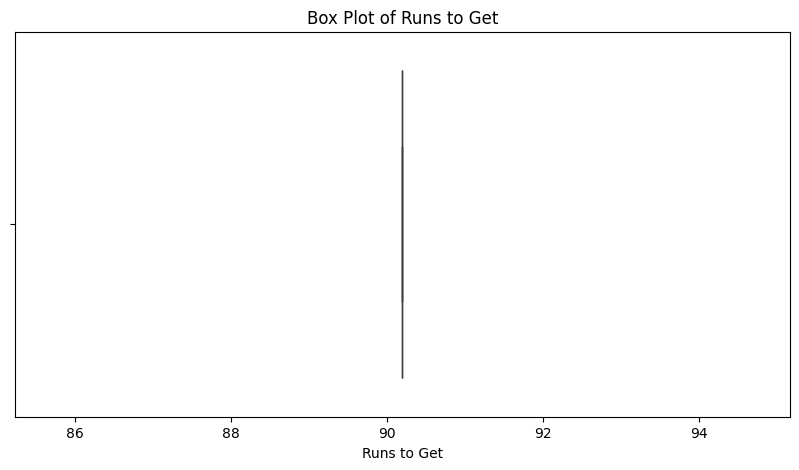

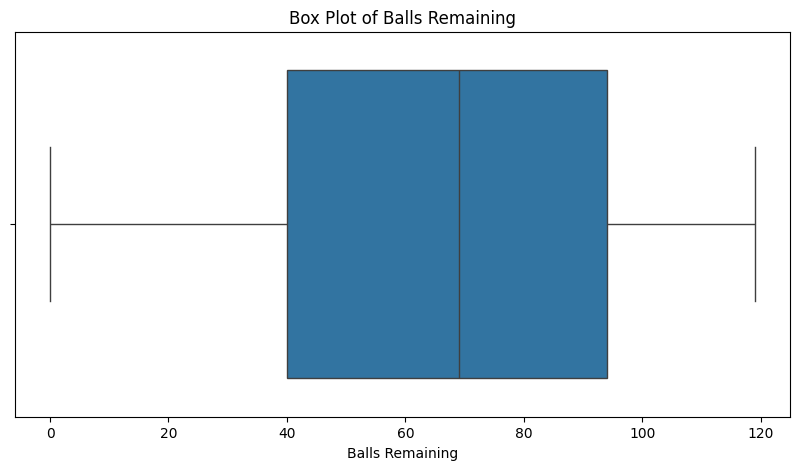

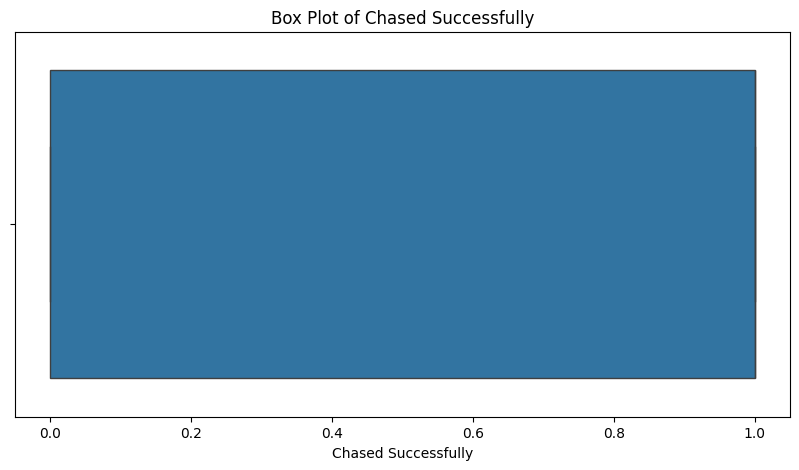

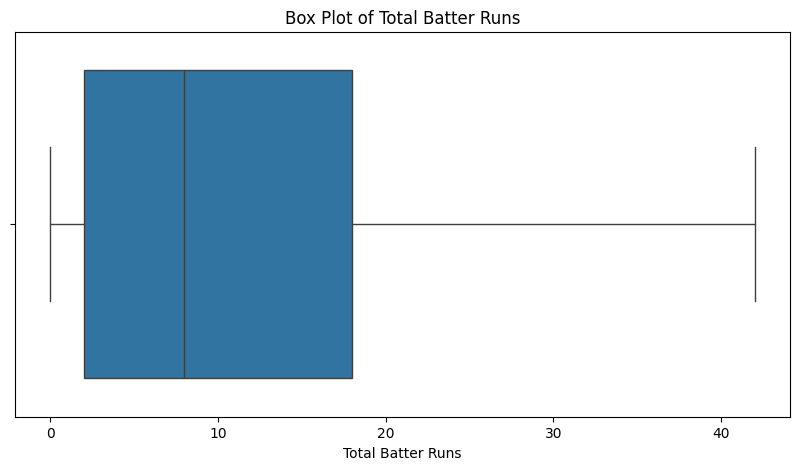

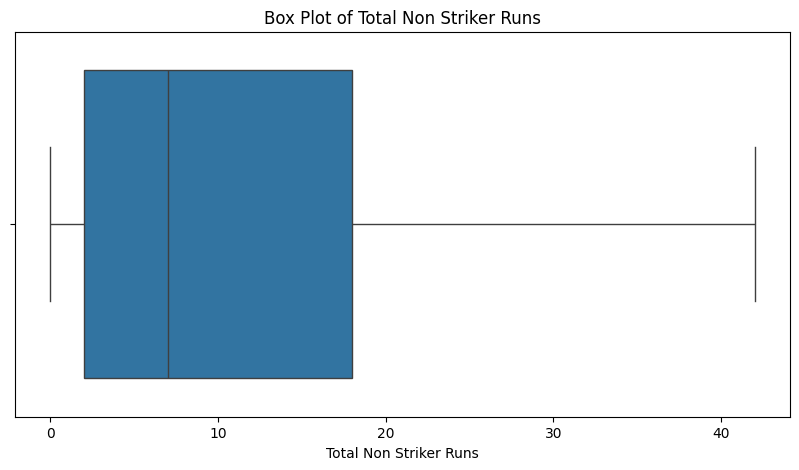

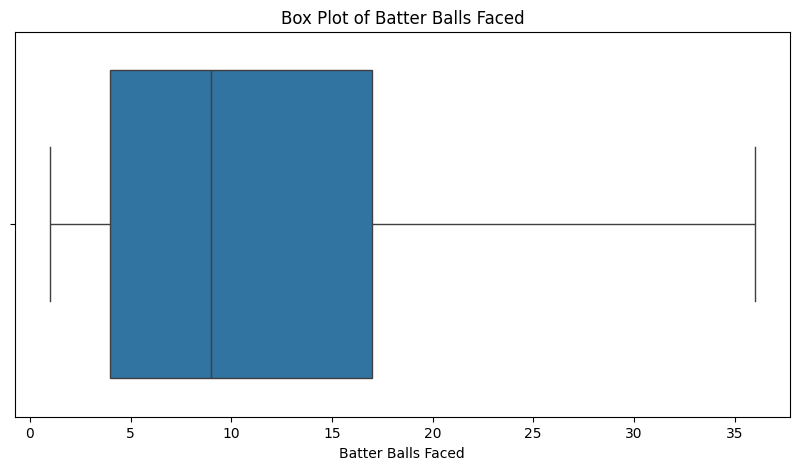

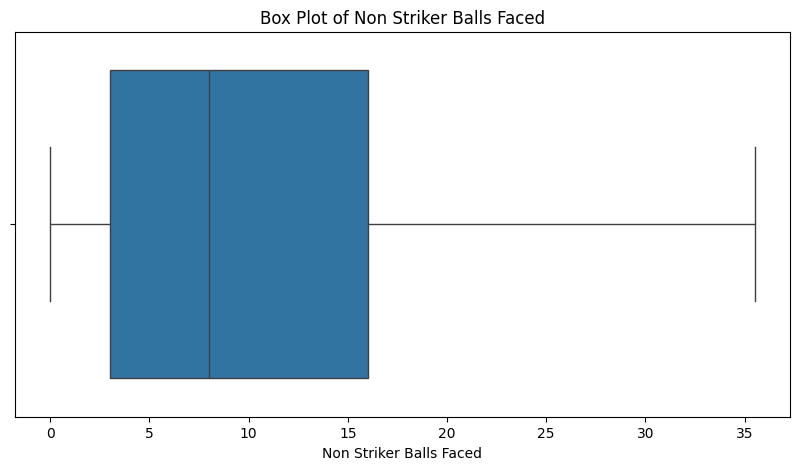

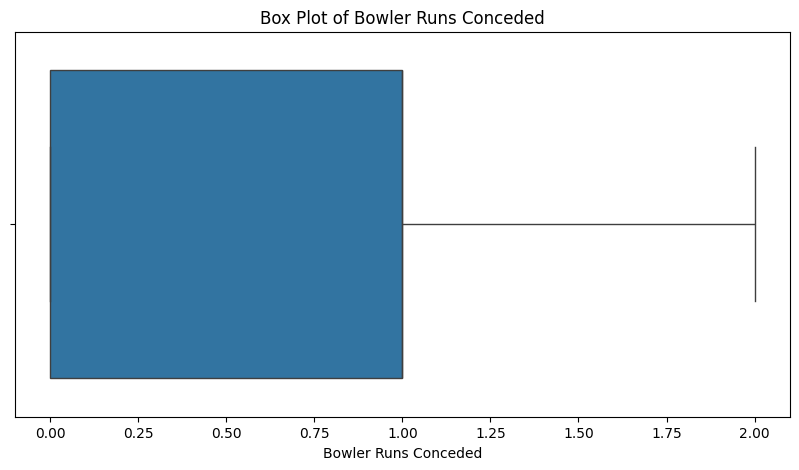

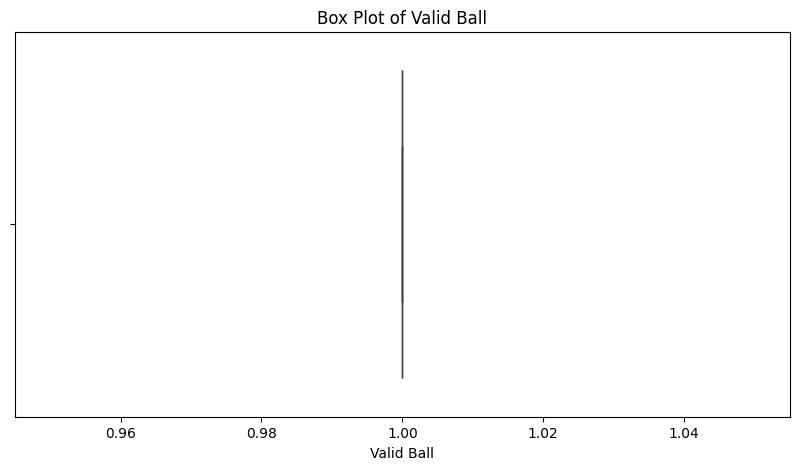

In [27]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

**Appling Models for Winner Predictor**

In [21]:
selected_features=df[['Bat First', 'Bat Second', 'Venue', 'Winner']]


In [22]:
X=selected_features.drop('Winner',axis=1)
y=selected_features['Winner']

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
for col in ['Venue', 'Bat First', 'Bat Second']:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

**Dropping Duplicates**

In [24]:
X.drop_duplicates()
X

,Bat First,Bat Second,Venue
248,71,9,34
249,71,9,34
250,71,9,34
252,71,9,34
253,71,9,34
...,...,...,...
424985,57,22,128
424988,57,22,128
424989,57,22,128
424990,57,22,128


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[-1.71885849, -0.38140527, -1.13345897],
       [ 0.38367173, -1.24240539, -1.57235542],
       [-1.71885849,  0.44515485,  0.90836365],
       ...,
       [ 1.25972599,  1.34059499, -0.75180988],
       [-0.177003  ,  0.34183484, -0.33199588],
       [ 0.97938863,  1.47835501,  0.27864266]])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)

}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Display a comparison of accuracies

print("\nModel Comparison:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

Logistic Regression Accuracy: 0.1078


c:\Users\Ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

                          precision    recall  f1-score   support

             Afghanistan       0.13      0.31      0.18      1141
               Argentina       0.00      0.00      0.00        26
               Australia       0.21      0.74      0.33      1196
                 Austria       0.00      0.00      0.00       209
                 Bahamas       0.00      0.00      0.00        49
                 Bahrain       0.00      0.00      0.00       204
              Bangladesh       0.00      0.00      0.00       798
                 Belgium       0.00      0.00      0.00       133
                  Belize       0.00      0.00      0.00        11
                 Bermuda       0.00      0.00      0.00       164
                  Bhutan       0.00      0.00      0.00        87
                Botswana       0.00      0.00      0.00        82
                Bulgaria       0.00      0.00      0.00       138
                  Canada       0.00      0.00      0.00       335
         

c:\Users\Ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                          precision    recall  f1-score   support

             Afghanistan       0.95      0.96      0.95      1141
               Argentina       1.00      1.00      1.00        26
               Australia       0.94      0.91      0.92      1196
                 Austria       0.91      0.96      0.93       209
                 Bahamas       1.00      1.00      1.00        49
                 Bahrain       0.93      0.93      0.93       204
              Bangladesh       0.82      0.87      0.84       798
                 Belgium       1.00      0.90      0.95       133
                  Belize       1.00      1.00      1.00        11
                 Bermuda       1.00      1.00      1.00       164
                  Bhutan       1.00      1.00      1.00        87
                Botswana       1.00      0.84      0.91        82
                Bulgaria       0.84      0.94      0.89       138
                  Canada       0.94      0.97      0.96       335
         

c:\Users\Ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[-1.71885849, -0.38140527, -1.13345897],
       [ 0.38367173, -1.24240539, -1.57235542],
       [-1.71885849,  0.44515485,  0.90836365],
       ...,
       [ 1.25972599,  1.34059499, -0.75180988],
       [-0.177003  ,  0.34183484, -0.33199588],
       [ 0.97938863,  1.47835501,  0.27864266]])

Random Forest Gives More Accuracy but need hyperparameter Tuning

In [34]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],      # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
# }

In [35]:
# # Create the Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


In [36]:
# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best Parameters found: ", grid_search.best_params_)
# print("Best Cross-Validation Accuracy: ", grid_search.best_score_)


In [37]:
# # Get the best estimator
# best_rf_model = grid_search.best_estimator_

# # Predict on the test set
# y_pred = best_rf_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Set Accuracy with Best Parameters: {accuracy:.4f}")



**Random Forest with FineTuned Parameters**

In [34]:
selected_features.drop_duplicates(inplace=True)
selected_features.shape

C:\Users\Ir\AppData\Local\Temp\ipykernel_8992\2692806088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.drop_duplicates(inplace=True)


(1432, 4)

In [35]:
X=selected_features.drop('Winner',axis=1)
y=selected_features['Winner']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
transformer1 = ColumnTransformer([('ohe_first_second_venue', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'), [0,1,2])], remainder = 'passthrough')

In [41]:
transformer2 = RandomForestClassifier(n_estimators=500)

In [42]:
pipe = Pipeline([('transformer1', transformer1), ('transformer2', transformer2)])

In [43]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_first_second_venue',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2])])),
                ('transformer2', RandomForestClassifier(n_estimators=500))])

In [45]:

prediction = pd.DataFrame([['Sri Lanka', 'India', 'Shere Bangla National Stadium']], columns = ['Bat First', 'Bat Second', 'Venue'])
winner = pipe.predict(prediction)
print(str(winner[0]))

India


In [49]:
distinct_teams = selected_features['Bat First'].unique()

# Initialize a list and append distinct teams
teams = []
teams.extend(distinct_teams)

print("Distinct Teams:", teams)

Distinct Teams: ['Scotland', 'Estonia', 'Portugal', 'Kuwait', 'Swaziland', 'Belize', 'England', 'United Arab Emirates', 'Denmark', 'Bangladesh', 'Finland', 'India', 'Papua New Guinea', 'Afghanistan', 'Japan', 'Sri Lanka', 'Croatia', 'Ireland', 'New Zealand', 'Romania', 'Pakistan', 'Gibraltar', 'Rwanda', 'Malaysia', 'Malta', 'Cyprus', 'Nepal', 'Austria', 'Samoa', 'Nigeria', 'South Africa', 'Australia', 'Belgium', 'Oman', 'Bahamas', 'Seychelles', 'West Indies', 'Panama', 'Jersey', 'Zimbabwe', 'Hong Kong', 'Kenya', 'Uganda', 'Botswana', 'Ghana', 'Vanuatu', 'Cayman Islands', 'Bahrain', 'Malawi', 'Isle of Man', 'Norway', 'Singapore', 'Netherlands', 'Maldives', 'Hungary', 'Canada', 'St Helena', 'Tanzania', 'Serbia', 'Namibia', 'Germany', 'Bulgaria', 'Thailand', 'Lesotho', 'Czech Republic', 'Luxembourg', 'Spain', 'Bhutan', 'Slovenia', 'Indonesia', 'Argentina', 'Bermuda', 'Sweden', 'Fiji', 'Cameroon', 'France', 'Turkey', 'Mozambique', 'Qatar', 'Italy', 'Gambia', 'Cook Islands', 'Philippines', 

In [50]:
# 12) Creating The GUI

# 12.1) Setting Appearance And Theme To Make GUI Look Appealing
ctk.set_appearance_mode("Dark") 
ctk.set_default_color_theme("blue") 


# 12.2) Creating GUI Class
class App(ctk.CTk):
    
    # 12.3) Making Function Which Is Called When Predict Is Pressed
    def button_event(self):
        teamA = self.teamAOptions.get()
        teamB = self.teamBOptions.get()
        venue = self.venueOptions.get()
        tossWin = self.tossWinOptions.get()
        
        if tossWin == teamA:
            prediction = pd.DataFrame([[teamA, teamB, venue]], columns = ['Bat First', 'Bat Second', 'Venue'])
        elif tossWin == teamB:
            prediction = pd.DataFrame([[teamB, teamA, venue]], columns = ['Bat First', 'Bat Second', 'Venue'])
            
        winner = pipe.predict(prediction)
        
        for i in range(101):
            self.after(1)
            self.progressBar.set(i/100)
            self.progressBar.update()
            
        self.predictionLabel.configure(text = str(winner[0]))
        
    # 12.3) Making Function Which Is Called When DropDown Menu Is Clicked    
    def updateAllDropDown(self, choice):
        teamA = self.teamAOptions.get()
        teamB = self.teamBOptions.get()
        tempTeamsA = teams.copy()
        tempTeamsB = teams.copy()
        tempTeamsA.remove(teamB)
        tempTeamsB.remove(teamA)
        self.teamA.configure(values = tempTeamsA)
        self.teamB.configure(values = tempTeamsB)
        self.tossWin.configure(values = [teamA, teamB])
        self.tossWin.set(teamA)
            
    # 12.4) Making Function Which Is Called When Window Is Closed
    def quit_me(self):
        self.quit()
        self.destroy()
        
    # 12.5) Making Class Constructor
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # 12.6) Setting Window Title And Size
        self.title("SIX SENSE CRICKET PREDICTIONS")
        self.geometry("1000x500")
        
        
        # 12.7) Making All Components (Labels/DropDown/Button/ProgressBar)
        self.titleLabel = ctk.CTkLabel(self, text = "SIX SENSE CRICKET PREDICTIONS", font = ("Arial", 40, "bold", "underline"), text_color = "White")
        self.titleLabel.place(relx = 0.5, rely = 0.1, anchor = ctk.N)
        
        self.teamALabel = ctk.CTkLabel(self, width = 150, text = "First Team : ", text_color = "White", font = ("Arial", 20))
        self.teamALabel.place(x = 100, rely = 0.3)
            
        self.teamAOptions = ctk.StringVar()
        self.teamA = ctk.CTkOptionMenu(self, variable = self.teamAOptions, width = 150, values = teams, font = ("Arial", 20), command = self.updateAllDropDown)
        self.teamA.place(x = 250, rely = 0.3)
        self.teamAOptions.set(teams[0])
        
        self.teamBLabel = ctk.CTkLabel(self, width = 150, text = "Second Team : ", text_color = "White", font = ("Arial", 20))
        self.teamBLabel.place(x = 600, rely = 0.3)
        
        self.teamBOptions = ctk.StringVar()
        self.teamB = ctk.CTkOptionMenu(self, variable = self.teamBOptions, width = 150, values = teams, font = ("Arial", 20), command = self.updateAllDropDown)
        self.teamB.place(x = 750, rely = 0.3)
        self.teamBOptions.set(teams[1])
        
        self.venueLabel = ctk.CTkLabel(self, width = 150, text = "Venue : ", text_color = "White", font = ("Arial", 20))
        self.venueLabel.place(x = 175, rely = 0.4)
        
        self.venueOptions = ctk.StringVar()
        self.venue = ctk.CTkOptionMenu(self, variable = self.venueOptions, width = 150, values = df['Venue'].unique(), font = ("Arial", 20))
        self.venue.place(x = 325, rely = 0.4)
        self.venueOptions.set(df['Venue'].unique()[0])
        
        self.tossWinLabel = ctk.CTkLabel(self, width = 150, text = "Toss : ", text_color = "White", font = ("Arial", 20))
        self.tossWinLabel.place(x = 525, rely = 0.4)
        
        self.tossWinOptions = ctk.StringVar()
        self.tossWin = ctk.CTkOptionMenu(self, variable = self.tossWinOptions, width = 150, values = teams, font = ("Arial", 20))
        self.tossWin.place(x = 675, rely = 0.4)
        self.tossWinOptions.set(self.teamAOptions.get())
        
        
        self.predictButton = ctk.CTkButton(self, width = 250, text = "Predict", command = self.button_event, font = ("Arial", 30))
        self.predictButton.place(x = 375, rely = 0.5)
        
        self.progressBar = ctk.CTkProgressBar(self, width = 800, mode = "determinate")
        self.progressBar.place(x = 100, rely = 0.7)
        self.progressBar.set(0)
        
        self.outcomeLabel = ctk.CTkLabel(self, width = 600, text = "The Team Which Is More Likely To Win Is : ", text_color = "White", font = ("Arial", 30))
        self.outcomeLabel.place(x = 125, rely = 0.8)
        
        self.predictionLabel = ctk.CTkLabel(self, width = 150, text = "", text_color = "White", font = ("Arial", 30))
        self.predictionLabel.place(x = 725, rely = 0.8)
        self.updateAllDropDown("HACK")
        
# 12.8) Running The App (GUI)
if __name__ == "__main__":
    app = App()
    app.protocol("WM_DELETE_WINDOW", app.quit_me)
    app.mainloop()

In [51]:
import pickle
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(pipe, file)


In [53]:
!pip install streamlit 

   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.6 MB 541.6 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.6 MB 610.3 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.6 MB 610.3 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/8.6 MB 662.5 kB/s eta 0:00:12
   ------ --------------------------------- 1.3/8.6 MB 721.7 kB/s e


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import streamlit as st
import pandas as pd
import pickle  # Assuming your model is saved as a pickle file

# Load the trained Random Forest model
with open("random_forest_model.pkl", "rb") as file:  # Replace with your model file name
    rf_model = pickle.load(file)

# Example Data
teams = selected_features["Bat First"].unique().tolist()  # Extract unique teams from the dataset
venues = selected_features["Venue"].unique().tolist() # Mock data for venues

# Function to predict the winner
def predict_winner(teamA, teamB, venue, tossWin):
    # Create the input data as required by your model
    if tossWin == teamA:
        prediction_input = pd.DataFrame([[teamA, teamB, venue]], columns=["Bat First", "Bat Second", "Venue"])
    else:
        prediction_input = pd.DataFrame([[teamB, teamA, venue]], columns=["Bat First", "Bat Second", "Venue"])

    # Make a prediction using the trained Random Forest model
    winner = rf_model.predict(prediction_input)
    return winner[0]

# Streamlit App
st.title("SIX SENSE CRICKET PREDICTIONS")

# Dropdowns for user input
teamA = st.selectbox("Select First Team", options=teams)
teamB = st.selectbox("Select Second Team", options=[t for t in teams if t != teamA])
venue = st.selectbox("Select Venue", options=df["Venue"].unique())
tossWin = st.selectbox("Toss Winner", options=[teamA, teamB])

# Predict button
if st.button("Predict"):
    with st.spinner("Predicting..."):
        winner = predict_winner(teamA, teamB, venue, tossWin)
        st.success(f"The Team Which Is More Likely To Win Is: {winner}")


2024-12-10 15:49:58.507 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 15:49:59.002 
  command:

    streamlit run c:\Users\Ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-10 15:49:59.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 15:49:59.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 15:49:59.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 15:49:59.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 15:49:59.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 15:49:59.